<a href="https://colab.research.google.com/github/AlbertoPaga/TFM-AutoencoderForPneumoniaDetection/blob/main/PruebaTFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resumen TFM

- Cargo y presento los datos totales
- Cargo imágenes y etiquetas para entrenamiento 
- Cargo imagénes y etiquetas para pruebas
- Están separadas entre imágenes sanas y enfermas para hacer dos generadores (1360 imágenes de entrenamiento para sanas y 3985 de enfermas, pero se reducirán a 1360 imágenes enfermas para igualarlas con las sanas y hacer un entrenamiento no sesgado
- Definimos el Encoder, Decoder y lo juntamos en el Autoencoder. También hay dos de las tres cosas, uno de imágenes sanas y otro de imágenes enfermas. El objetivo es utilizar ambas en uno One-Class Classification de forma que cada una esté especializada y puedan clasificar mejor las imágenes
- A **14/12/2021** tenemos los siguientes modelos:

  - **Modelo 1** (128,128,3)->(128,128,128)->(128,128,128)->(64,64,128)->(64,64,64)->(64,64,32)->(32,32,32)->(32,32,16)->(32,32,8)->(16,16,8)

  - **Modelo 2** (128,128,3)->(128,128,128)->(128,128,128)->(64,64,128)->(64,64,128)->(64,64,128)->(32,32,128)->(32,32,64)->(32,32,32)->(16,16,32)

  - **Modelo 3** (128,128,3)->(128,128,128)->(128,128,128)->(64,64,128)->(64,64,64)->(64,64,32)->(32,32,32)->(32,32,16)->(32,32,8)->(16,16,8)

  - **Modelo 4** (128,128,3)->(128,128,128)->(128,128,128)->(64,64,128)->(64,64,64)->(64,64,32)->(32,32,32)->(32,32,16)->(32,32,8)->(16,16,8)

  - **Modelo 5** (128,128,3)->(128,128,128)->(128,128,128)->(64,64,128)->(64,64,64)->(64,64,32)->(32,32,32)->(32,32,16)->(32,32,8)->(16,16,8)


- Entrenamos todos los modelos propuestos en dos history, uno para modelos de sanas y otro para modelos de enfermas, de 100 epochs y 42 pasos por epoch (el número de imágenes 1360 % 32)
- A continuación se realiza la carga de las imágenes sanas y enfermas de entrenamiento (1360) para utilizarlas en el cálculo de valores estadísticos útiles
-También se debe realizar la carga de las etiquetas de las imágenes de entrenamiento tanto sanas como enfermas para utilizarlas en el cálculo de valores estadísticos útiles
- Guardado
- Cargado
- **Pruebas sobre modelo autencoder completo SANAS.** Durante estas pruebas se utilizará el modelo autoencoder completo que ha sido entrenado con las imágenes **SANAS** y para probar tan solo se usarán imágenes **SANAS**:
  * Se calcula el **MSE medio** sobre las imágenes de entrenamiento **SANAS**. (0.00340803) Aquí se pretende saber qué error cuadrático tiene el modelo sobre imágenes **SANAS** con las que ha sido entrenado y así tener este valor de referencia para posteriormente poder comparar.
  * Se cargan las imágenes **SANAS** de entrenamiento y realiza una prueba con una imagen aleatoria (Se muestran algunos valores útiles, la imagen original y luego la reconstruída)
  * Se calcula el **MSE** sobre la imágen anteriormente utilizada (0.00381695) y la **similitud estructural** de ambas imágenes (0.64737413)
  * Se muestra un mosaico con 30 imágenes originales **SANAS** de prueba y posteriormente otro mosaico con las 30 reconstrucciones de las mismas por parte del modelo
  * Ahora se procede a calcular el **MSE** sobre las imágenes de prueba. (0.00334091) Así se quiere ver qué tan bien reconstruye el modelo las imágenes si comparamos el **MSE** sobre las imágenes de entrenamiento y el **MSE** sobre las imágenes de prueba.
  * También se calcula la **similitud estructural media** (0.64931501) entre las imágenes **SANAS** de prueba originales y las reconstruídas por el modelo.
- **Pruebas sobre modelo autoencoder completo ENFERMAS.** Durante estas pruebas se utilizará el modelo autoencoder completo que ha sido entrenado con las imágenes **ENFERMAS** y para probar tan solo se usarán imágenes **ENFERMAS**:
  * Todos los pasos son iguales pero utilizando las imágenes de pulmones **ENFERMOS**.
  * **MSE medio** sobre las imágenes de entrenamiento **ENFERMAS**: (0.00237647)
  * **MSE** sobre la imágen aleatoria utilizada (0.00306953) y la **similitud estructural** de ambas imágenes (0.60328844)
  * **MSE** sobre las imágenes de prueba: (0.00244281)
  * **Similitud estructural media** (0.64931501) entre las imágenes **ENFERMAS** de prueba originales y las reconstruídas.
- **Carga de la imágenes y etiquetas de pruebas.** Aquí se procede a la carga completa de imágenes de prueba y sus etiquetas correspondientes, tanto de **SANAS** como de **ENFERMAS**. Ambas se juntan en un mismo array **imagenes_sanas_enfermas_totales** compuesto por **468 imágenes** (234 **SANAS** y 234 **ENFERMAS**)
- **Pruebas sobre ambos modelos con imagen ALEATORIA. Clasificación.** En estas pruebas se pretende probar qué tal clasificaría una imagen aleatoria (**SANA** o **ENFERMA**) cada uno de los modelos anteriormente presentados (modelo entrenado con **SANAS**, modelo entrenado con  **ENFERMAS**):
  * Se presenta la imagen aleatoria que se intentará calsificar
  * Se presenta la imagen ya reconstruida mediante el modelo **SANAS**, además se muestra el **MSE** y la **similitud estructural** de la misma.
  * Se hace lo mismo pero con la imagen reconstruida mediante el modelo **ENFERMAS**. Se muestra el **MSE** y la **similitud estructural**.
  * Se crea un **if/else** para clasificar la imágen en función de los valores establecidos de **MSE** y **similitud estructural** y los obtenidos en esta imagen en concreto. Los criterios de esta clausula es:
    * if (**simil_enferma** > **simil_sana** and **mse_enferma** > **mse_sana**) then **ENFERMA** pero con posible error
    * if (**simil_enferma** > **simil_sana** and **mse_sana** > **mse_enferma**) then **ENFERMA**
    * if (**simil_sana** > **simil_enferma** and **mse_enferma** > mse_sana) then **SANA**
    * if (**simil_sana** > **simil_enferma** and **mse_sana** > **mse_enferma**) then **SANA** pero con posible error
    * if (**simil_sana** == **simil_enferma** and **mse_sana** > **mse_enferma**) then **NO SE PUEDE CLASIFICAR**
  * Se realiza el mismo proceso resumido para otra imagen aleatoria.
- **Pruebas sobre ambos modelos con imagenes previamente clasificadas.** Viendo los resultados anteriores, me plantée probar si todas las imágenes que sabemos que son **SANAS** se clasificarían como **SANAS** por nuestros modelos y lo mismo con las **ENFERMAS**. Para ello, se siguen los siguientes pasos probando primero con las imágenes **ENFERMAS** (234) y luego con las imágenes **SANAS** (234):
  * Se crea un **bucle for** que va calculando el **MSE** de cada prediccion de imagen con cada uno de los dos modelos, tanto el **SANO** como el **ENFERMO**.
  * A continuación hay unas **clausulas if/else** que van comparando los resultados y se encargan de realizar la clasificación. Los criterios de comparación son los siguientes:
    * Si se estan probando imágenes **ENFERMAS** y el **mse_sana** > **mse_enferma** entonces la imagen será **ENFERMA**
    * Else, entonces será **SANA** (Se obtiene un 100%)
    * Si se estan probando imágenes **SANAS** y el **mse_enferma** > **mse_sana** entonces la imagen será **SANA**
    * Else, entonces será **ENFERMA** (Se obtiene un 0%)
- **Pruebas totales.** Estas son las pruebas más recientes, creadas para intentar mejorar las realizadas anteriormente y aplicando todo un poco para conseguir conclusiones sobre el desempeño de nuestro modelo en la tarea de clasificación:
  * **PRUEBAS CON MSE:**
  * El primer paso es obtener el **MSE medio** del autoencoder **SANO** (entrenado con imágenes **SANAS**) con las imágenes de entrenamiento. Además tambien se calcula la **mediana del MSE** con la intención de comparar los resultados de las pruebas con este dato y estimar su "acercamiento" o "alejamiento" al mismo, para así poder clasificar la imagen como **SANA** o **ENFERMA**.
  * Seguidamente, se realiza en mismo proceso pero para el **MSE(media y mediana)** del autoencoder **ENFERMO** con sus imágenes de entrenamiento **ENFERMAS**
  * Se crea un **bucle for** que va calculando el **MSE** de cada prediccion de imagen con cada uno de los dos modelos, tanto el **SANO** como el **ENFERMO**. En esta celda se utilizarán las imágenes de prueba **ENFERMAS** (234) y en la siguiente las imágenes de prueba **SANAS** (234)
  * Se calcula el **MSE absoluto** de cada iteración de imagen, de dos formas formas, o  bien **restando** **mse** de la misma al **MSE medio** o, restándoselo a la **mediana del MSE**, ambas cosas anteriormente calculadas.
  * A continuación hay unas **clausulas if/else** que van comparando los resultados y se encargan de realizar la clasificación. Los criterios de comparación son los siguientes:
    * Si probamos con imágenes **ENFERMAS** y **mse_sana (absoluto)** > **mse_enferma (absoluto)** entonces la imagen será **ENFERMA**
    * Si no, se tratará de una imagen **SANA**
  * La siguiente celda hace el mismo proceso pero utilizando las imágenes **SANAS** (234) para probar su clasificación. Los criterios de sus **clausula if/else** son:
    * Si probamos con imágenes **SANAS** y **mse_enferma (absoluto)** > **mse_sana (absoluto**) entonces la imagen será **SANA**
    * Si no, se tratará de una imagen **ENFERMA**

    * **PRUEBAS CON SIMILITUD ESTRUCTURAL:**
    * Lo pasos son similares a los realizados en el sub-apartado anterior. Se calculan tanto la similitud estructural media como la similitud estructural mediana de ambos modelos (**SANO** y **ENFERMO**) cada uno sobre sus imágenes de entrenamiento. Posteriormente se procede a realizar las pruebas de clasificación, primero con las imágenes de prueba **ENFERMAS** y luego con las imágenes de prueba **SANAS**. Se utilizan ambos modelos y como se ha explicado anteriormente, se utilizan unos criterios de comparación basados en los datos anteriormente obtenidos y los calculados en cada uno de las iteraciones.




# Carga de Drive y todas las librerias necesarias

CELDA 1 - Montar Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CELDA 2 - Importar todo lo necesario

In [2]:
#IMPORTS
import tensorflow as tf
import keras                      
import numpy as np
import cv2   
import csv
import os
import math
import random
import pickle
import tensorflow.keras.layers
import tensorflow.keras.models
%matplotlib inline
from glob import glob
from keras import optimizers
from keras import layers
from keras import models
from keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import zero_one_loss
from sklearn.metrics import recall_score
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from PIL import Image

CELDA 3 - Definir constantes

In [3]:
#CONSTANTES

IMA_SIZE = 128

NUM_TRAIN_FILES = 20
NUM_TEST_FILES = 2


# Presentación de datos totales detallados

CELDA 4 - Definir paths de entrenamiento y de prueba

In [ ]:
train_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/train'
train_sanas_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL'
train_enfermas_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/train/PNEUMONIA'

test_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/test'
test_sanas_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/test/NORMAL'
test_enfermas_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/test/PNEUMONIA'

val_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/val'

CELDA 5 - Presentación de los datos detallados

In [ ]:
train_data_dir = train_path  
train_data_sanas_dir = train_sanas_path
train_data_enfermas_dir = train_enfermas_path

validation_data_dir = val_path

test_data_dir = test_path 
test_data_sanas_dir = test_sanas_path 
test_data_enfermas_dir = test_enfermas_path 

target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]

nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])  
nb_train_sanas_samples = sum([len(files) for _, _, files in os.walk(train_data_sanas_dir)])  
nb_train_enfermas_samples = sum([len(files) for _, _, files in os.walk(train_data_enfermas_dir)])  

nb_validation_samples = sum([len(files) for _, _, files in os.walk(validation_data_dir)])

nb_test_samples = sum([len(files) for _, _, files in os.walk(test_data_dir)])
nb_test_sanas_samples = sum([len(files) for _, _, files in os.walk(test_data_sanas_dir)])
nb_test_enfermas_samples = sum([len(files) for _, _, files in os.walk(test_data_enfermas_dir)])

total_nb_samples = nb_train_samples + nb_validation_samples + nb_test_samples

epochs = 100
batch_size = 45

nb_classes = len(target_names)      # number of output classes

print( '\n - Número de clases: ', nb_classes, '\n - Nombre de las clases: ', target_names, '\n')
print(' - Número de imágenes sanas de entrenamiento: ', nb_train_sanas_samples,
      '\n - Número de imágenes enfermas de entrenamiento: ', nb_train_enfermas_samples,
      '\n - Número de imágenes totales de entrenamiento: ', nb_train_samples, '\n'
      '\n - Número de imágenes sanas de prueba: ', nb_test_sanas_samples,
      '\n - Número de imágenes enfermas de prueba: ', nb_test_enfermas_samples, 
      '\n - Número de imágenes totales de prueba: ', nb_test_samples,'\n'
      '\n - Número de ejemplos de validación: ', nb_validation_samples,
      '\n   --------------------------------\n - Número de ejemplos totales: ', total_nb_samples,
      '\n\n - Número de epochs: ', epochs, '\n - Tamaño del batch: ', batch_size)


 - Número de clases:  2 
 - Nombre de las clases:  ['NORMAL', 'PNEUMONIA'] 

 - Número de imágenes sanas de entrenamiento:  1364 
 - Número de imágenes enfermas de entrenamiento:  3986 
 - Número de imágenes totales de entrenamiento:  5351 

 - Número de imágenes sanas de prueba:  234 
 - Número de imágenes enfermas de prueba:  390 
 - Número de imágenes totales de prueba:  625 

 - Número de ejemplos de validación:  19 
   --------------------------------
 - Número de ejemplos totales:  5995 

 - Número de epochs:  100 
 - Tamaño del batch:  45


# Carga/Presentación de imágenes y etiquetas para entrenamiento

CELDA 6 - Carga de imágenes y etiquetas sanas para entrenamiento

In [ ]:
train_sanas_list_path = shuffle(glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/*.jpeg'))
train_sanas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_normal_image_file_{}.npy'
label_sanas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_normal_image_label_file_{}.npy'

max_images = math.floor(len(train_sanas_list_path) / NUM_TRAIN_FILES)
max_labels = max_images
print('Número de imágenes sanas para entrenamiento ->', len(train_sanas_list_path), ' de las que utilizaremos ', max_images * NUM_TRAIN_FILES)
print('Número de archivos de imágenes sanas para entrenamiento ->', NUM_TRAIN_FILES)
print('Número de imágenes sanas por archivo ->', max_images,'\n')

print('Número de etiquetas de imágenes sanas para entrenamiento ->', len(train_sanas_list_path),' de las que utilizaremos ', max_images * NUM_TRAIN_FILES)
print('Número de archivos de etiquetas de imágenes sanas para entrenamiento ->', NUM_TRAIN_FILES)
print('Número de etiquetas por archivo ->', max_images)

index = 0
for train_file_index in range(NUM_TRAIN_FILES):

  train_images = []
  train_label = []
  i = 0
  for i in range(max_images - 1):
    image_path = train_sanas_list_path[index]
    #print(image_path)
    if image_path.endswith(".jpeg"):
      if "NORMAL" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(IMA_SIZE,IMA_SIZE))
        train_images.append(image)
        label = 0
        label = str(label)
        #print(label)
        train_label.append(label)
        #print("Normal")

    index = index + 1

  train_sanas_images = np.array(train_images)
  train_sanas_labels = np.array(train_label)
  #print(image_path)
  print('\n Número de archivo ', train_file_index)
  print('Creado archivo imágenes sanas con path -> ', train_sanas_files_path.format(train_file_index))
  print('Creado archivo etiquetas de imágenes sanas con path -> ', label_sanas_files_path.format(train_file_index))

  np.save(train_sanas_files_path.format(train_file_index), train_sanas_images)
  np.save(label_sanas_files_path.format(train_file_index), train_sanas_labels)

#comprobacion = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_sana_image_file_0.npy')
#print('\n',len(comprobacion))
print('\n','Archivos de imágenes sanas de entrenamiento creados con éxito')
print('\n','Archivos de etiquetas sanas de entrenamiento creados con éxito')

Número de imágenes sanas para entrenamiento -> 1363  de las que utilizaremos  1360
Número de archivos de imágenes sanas para entrenamiento -> 20
Número de imágenes sanas por archivo -> 68 

Número de etiquetas de imágenes sanas para entrenamiento -> 1363  de las que utilizaremos  1360
Número de archivos de etiquetas de imágenes sanas para entrenamiento -> 20
Número de etiquetas por archivo -> 68


KeyboardInterrupt: ignored

CELDA 7 - Presentación de imagen sana aleatoria y etiqueta para entrenamiento

In [ ]:
a = random.randint(0, 19)
b =  random.randint(0, 67)

imagen_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_normal_image_file_'+ str(a)+'.npy')
label_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_normal_image_label_file_'+str(a)+'.npy')



print('Esto es un ejemplo de una imagen sana de entrenamiento con path -> /content/drive/My Drive/Colab Notebooks/TFG/' + 'train_normal_image_file_' + str(a) +'.npy \n'
'Número de imagen',b , '\n', imagen_1[b], '\n')
print('Y esto es un ejemplo de etiqueta de la imagen', b,'para ver que sólo se han cargado las imágenes de pulmones sanos -> \n', label_1[b])

Esto es un ejemplo de una imagen sana de entrenamiento con path -> /content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_19.npy 
Número de imagen 33 
 [[[42 42 42]
  [50 50 50]
  [57 57 57]
  ...
  [46 46 46]
  [38 38 38]
  [62 62 62]]

 [[43 43 43]
  [47 47 47]
  [58 58 58]
  ...
  [47 47 47]
  [36 36 36]
  [61 61 61]]

 [[38 38 38]
  [42 42 42]
  [53 53 53]
  ...
  [41 41 41]
  [36 36 36]
  [61 61 61]]

 ...

 [[21 21 21]
  [17 17 17]
  [18 18 18]
  ...
  [18 18 18]
  [19 19 19]
  [23 23 23]]

 [[22 22 22]
  [16 16 16]
  [15 15 15]
  ...
  [20 20 20]
  [19 19 19]
  [20 20 20]]

 [[18 18 18]
  [18 18 18]
  [21 21 21]
  ...
  [21 21 21]
  [19 19 19]
  [22 22 22]]] 

Y esto es un ejemplo de etiqueta de la imagen 33 para ver que sólo se han cargado las imágenes de pulmones sanos -> 
 0


CELDA 8 - Carga de imágenes y etiquetas enfermas para entrenamiento

In [ ]:
train_enfermas_list_path = shuffle(glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/PNEUMONIA/*.jpeg'))
train_enfermas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_enferma_image_file_{}.npy'
label_enfermas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_enferma_image_label_file_{}.npy'



max_images = 68 #math.floor(len(train_enfermas_list_path) / NUM_TRAIN_FILES)
max_labels = max_images
print('Número de imágenes enfermas para entrenamiento', len(train_enfermas_list_path),', pero para igualar con el número de imágenes '
'sanas, se utilizarán', max_images * NUM_TRAIN_FILES)
print('Número de archivos de imágenes enfermas para entrenamiento', NUM_TRAIN_FILES)
print('Número de imágenes enfermas por archivo', max_images,'\n')

print('Número de etiquetas de imágenes enfermas para entrenamiento', len(train_enfermas_list_path),', pero para igualar con el número de imágenes '
'sanas, se utilizarán', max_images * NUM_TRAIN_FILES)
print('Número de archivos de etiquetas de imágenes enfermas de entrenamiento', NUM_TRAIN_FILES)
print('Número de etiquetas por archivo', max_images)

index = 0
for train_file_index in range(NUM_TRAIN_FILES):

 train_images = []
 train_label = []
 for i in range(max_images):
   image_path = train_enfermas_list_path[index]
   #print(image_path)
   if image_path.endswith(".jpeg"):
     if "PNEUMONIA" in image_path:
       image = cv2.imread(image_path)
       image = cv2.resize(image,(IMA_SIZE,IMA_SIZE))
       train_images.append(image)
       label = 1
       label = str(label)
       #print(label)
       train_label.append(label)
       #print("Normal")

   index = index + 1

 train_enfermas_images = np.array(train_images)
 train_enfermas_labels = np.array(train_label)
 #print(image_path)
 print('\n Número de archivo ', train_file_index)
 print('Creado archivo imagenes con path -> ', train_enfermas_files_path.format(train_file_index))
 print('Creado archivo etiquetas con path -> ', label_enfermas_files_path.format(train_file_index))

 np.save(train_enfermas_files_path.format(train_file_index), train_enfermas_images)
 np.save(label_enfermas_files_path.format(train_file_index), train_enfermas_labels)

#comprobacion = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_0.npy')
#print('\n',len(comprobacion))
print('\n','Archivos de imagenes enfermas de entrenamiento creados con exito')
print('\n','Archivos de etiquetas enfermas de entrenamiento creados con exito')

Número de imágenes enfermas para entrenamiento 3985 , pero para igualar con el número de imágenes sanas, se utilizarán 1360
Número de archivos de imágenes enfermas para entrenamiento 20
Número de imágenes enfermas por archivo 68 

Número de etiquetas de imágenes enfermas para entrenamiento 3985 , pero para igualar con el número de imágenes sanas, se utilizarán 1360
Número de archivos de etiquetas de imágenes enfermas de entrenamiento 20
Número de etiquetas por archivo 68


KeyboardInterrupt: ignored

CELDA 9 - Presentación de imagen enferma aleatoria y etiqueta para entrenamiento

In [ ]:
a = random.randint(0, 19)
b =  random.randint(0, 67)

imagen_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_enferma_image_file_'+ str(a)+'.npy')
label_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_enferma_image_label_file_'+str(a)+'.npy')

print('Esto es un ejemplo de una imagen enferma de entrenamiento con path -> /content/drive/My Drive/Colab Notebooks/TFG/' + 'train_enferma_image_file_' + str(a)+ '.npy \n'
'Número de imagen',b , '\n', imagen_1[b], '\n')
print('Y esto es un ejemplo de etiqueta de la imagen',b,'para ver que sólo se han cargado las imágenes de pulmones enfermos -> \n', label_1[b])

Esto es un ejemplo de una imagen enferma de entrenamiento con path -> /content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_3.npy 
Número de imagen 46 
 [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [19 19 19]
  [20 20 20]
  [19 19 19]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [23 23 23]
  [21 21 21]
  [20 20 20]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [21 21 21]
  [22 22 22]
  [23 23 23]]

 ...

 [[ 7  7  7]
  [ 9  9  9]
  [ 5  5  5]
  ...
  [10 10 10]
  [11 11 11]
  [11 11 11]]

 [[ 7  7  7]
  [ 7  7  7]
  [ 6  6  6]
  ...
  [ 9  9  9]
  [11 11 11]
  [11 11 11]]

 [[ 7  7  7]
  [ 6  6  6]
  [ 8  8  8]
  ...
  [11 11 11]
  [11 11 11]
  [12 12 12]]] 

Y esto es un ejemplo de etiqueta de la imagen 46 para ver que sólo se han cargado las imágenes de pulmones enfermos -> 
 1


# Carga/Presentación de imágenes y etiquetas para pruebas

CELDA 10 - Carga de imágenes y etiquetas sanas para pruebas

In [ ]:
 test_sanas_list_path = shuffle(glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/NORMAL/*.jpeg'))
 test_sanas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_normal_image_file_{}.npy'
 label_sanas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_normal_image_label_file_{}.npy'


 max_images = math.floor(len(test_sanas_list_path) / NUM_TEST_FILES)
 print('Número de imágenes sanas totales para pruebas', len(test_sanas_list_path))
 print('Número de archivos de imágenes sanas para pruebas', NUM_TEST_FILES)
 print('Número de imágenes por archivo', max_images,'\n')

 print('Número de etiquetas de imágenes sanas para pruebas', len(test_sanas_list_path))
 print('Número de archivos de etiquetas de imágenes sanas de prueba', NUM_TEST_FILES)
 print('Número de etiquetas por archivo', max_images)

 index = 0
 for test_file_index in range(NUM_TEST_FILES):

  test_images = []
  test_label = []

  for i in range(max_images):
    image_path = test_sanas_list_path[index]
    #print(image_path)
    if image_path.endswith(".jpeg"):
      if "NORMAL" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(IMA_SIZE,IMA_SIZE))
        test_images.append(image)
        label = 0
        label = str(label)
        #print(label)
        test_label.append(label)
        #print("NORMAL")

    index = index + 1

  test_images = np.array(test_images)
  test_label = np.array(test_label)
  #print(image_path)
  print('\n Número de archivo', test_file_index)
  print('Creado archivo imagenes con path -> ', test_sanas_files_path.format(test_file_index))
  print('Creado archivo etiquetas con path -> ', label_sanas_files_path.format(test_file_index))
  np.save(test_sanas_files_path.format(test_file_index), test_images)
  np.save(label_sanas_files_path.format(test_file_index), test_label)

#comprobacion = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_file_0.npy')
#print('\n',len(comprobacion))
print('\n','Archivos de imágenes sanas de prueba creados con éxito')
print('\n','Archivos de etiquetas de imágenes sanas de prueba creados con éxito')

Número de imágenes sanas totales para pruebas 234
Número de archivos de imágenes sanas para pruebas 2
Número de imágenes por archivo 117 

Número de etiquetas de imágenes sanas para pruebas 234
Número de archivos de etiquetas de imágenes sanas de prueba 2
Número de etiquetas por archivo 117


KeyboardInterrupt: ignored

CELDA 11 - Presentación de imagen sana aleatoria y etiqueta para pruebas

In [ ]:
a = random.randint(0, 1)
b =  random.randint(0, 116)

imagen_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_normal_image_file_'+ str(a)+'.npy')
label_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_normal_image_label_file_'+str(a)+'.npy')

print('Esto es un ejemplo de una imagen sana de prueba con path -> /content/drive/My Drive/Colab Notebooks/TFG/' + 'test_normal_image_file_' + str(a) +'.npy \n'
'Número de imagen',b , '\n', imagen_1[b], '\n')
print('Y esto es un ejemplo de etiqueta de la imagen',b,'para ver que sólo se han cargado las imágenes de pulmones sanos -> \n', label_1[b])

Esto es un ejemplo de una imagen sana de prueba con path -> /content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_file_0.npy 
Número de imagen 83 
 [[[ 92  92  92]
  [102 102 102]
  [105 105 105]
  ...
  [ 66  66  66]
  [ 46  46  46]
  [ 14  14  14]]

 [[ 92  92  92]
  [104 104 104]
  [119 119 119]
  ...
  [ 67  67  67]
  [ 46  46  46]
  [  8   8   8]]

 [[ 97  97  97]
  [103 103 103]
  [128 128 128]
  ...
  [ 61  61  61]
  [ 37  37  37]
  [  4   4   4]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]] 

Y esto es un ejemplo de etiqueta de la imagen 83 para ver que sólo se han cargado las imágenes de pulmones sanos -> 
 0


CELDA 12 - Carga de imágenes y etiquetas enfermas para pruebas

In [ ]:
test_enfermas_list_path = shuffle(glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/PNEUMONIA/*.jpeg'))
test_enfermas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_enferma_image_file_{}.npy'
label_enfermas_files_path = '/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_enferma_image_label_file_{}.npy'


max_images = 117
print('Número de imágenes enfermas totales para pruebas', len(test_enfermas_list_path),' de las que utilizaremos', max_images * NUM_TEST_FILES)
print('Número de archivos de imágenes enfermas para pruebas', NUM_TEST_FILES)
print('Número de imágenes por archivo', max_images,'\n')

print('Número de etiquetas de imágenes enfermas para pruebas', len(test_enfermas_list_path),' de las que utilizaremos', max_images * NUM_TEST_FILES)
print('Número de archivos de etiquetas de imágenes enfermas de prueba', NUM_TEST_FILES)
print('Número de etiquetas por archivo', max_images)

index = 0
for test_file_index in range(NUM_TEST_FILES):

 test_images = []
 test_label = []

 for i in range(max_images):
   image_path = test_enfermas_list_path[index]
   #print(image_path)
   if image_path.endswith(".jpeg"):
     if "PNEUMONIA" in image_path:
       image = cv2.imread(image_path)
       image = cv2.resize(image,(IMA_SIZE,IMA_SIZE))
       test_images.append(image)
       label = 1
       label = str(label)
       #print(label)
       test_label.append(label)
       #print("PNEUMONIA")
   index = index + 1

 test_images = np.array(test_images)
 test_label = np.array(test_label)
 #print(image_path)
 print('\n Número de archivo', test_file_index)
 print('Creado archivo imagenes con path -> ', test_enfermas_files_path.format(test_file_index))
 print('Creado archivo etiquetas con path -> ', label_enfermas_files_path.format(test_file_index))
 np.save(test_enfermas_files_path.format(test_file_index), test_images)
 np.save(label_enfermas_files_path.format(test_file_index), test_label)

#comprobacion = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_file_0.npy')
#print('\n',len(comprobacion))
print('\n','Archivos de imagenes enfermas de prueba creados con exito')
print('\n','Archivos de etiquetas de imágenes enfermas de prueba creados con exito')

Número de imágenes enfermas totales para pruebas 390  de las que utilizaremos 234
Número de archivos de imágenes enfermas para pruebas 2
Número de imágenes por archivo 117 

Número de etiquetas de imágenes enfermas para pruebas 390  de las que utilizaremos 234
Número de archivos de etiquetas de imágenes enfermas de prueba 2
Número de etiquetas por archivo 117


KeyboardInterrupt: ignored

CELDA 13 - Presentación de imagen enferma aletatoria y etiqueta para prueba

In [ ]:
a = random.randint(0, 1)
b =  random.randint(0, 116)

imagen_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_enferma_image_file_'+ str(a)+'.npy')
label_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_enferma_image_label_file_'+str(a)+'.npy')

print('Esto es un ejemplo de una imagen enferma de prueba con path -> /content/drive/My Drive/Colab Notebooks/TFG/' + 'test_enferma_image_file_' + str(a) + '.npy \n'
'Número de imagen',b , '\n', imagen_1[b], '\n')
print('Y esto es un ejemplo de etiqueta de la iamgen',b,'para ver que sólo se han cargado las imágenes de pulmones enfermos -> \n', label_1[b])

Esto es un ejemplo de una imagen enferma de prueba con path -> /content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_file_1.npy 
Número de imagen 113 
 [[[ 48  48  48]
  [ 55  55  55]
  [152 152 152]
  ...
  [139 139 139]
  [ 45  45  45]
  [ 59  59  59]]

 [[137 137 137]
  [165 165 165]
  [169 169 169]
  ...
  [162 162 162]
  [ 44  44  44]
  [ 30  30  30]]

 [[174 174 174]
  [172 172 172]
  [170 170 170]
  ...
  [ 99  99  99]
  [ 48  48  48]
  [ 36  36  36]]

 ...

 [[ 56  56  56]
  [ 27  27  27]
  [ 13  13  13]
  ...
  [ 13  13  13]
  [ 11  11  11]
  [ 28  28  28]]

 [[ 58  58  58]
  [ 27  27  27]
  [ 13  13  13]
  ...
  [ 12  12  12]
  [ 10  10  10]
  [ 26  26  26]]

 [[ 59  59  59]
  [ 29  29  29]
  [ 13  13  13]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 19  19  19]]] 

Y esto es un ejemplo de etiqueta de la iamgen 113 para ver que sólo se han cargado las imágenes de pulmones enfermos -> 
 1


# Definición/Carga del autogenerador

CELDA 14 - Difinición del generador propio

In [ ]:

def my_generator(matrix_path,batch_size=45, batch_per_file=6, shuffle_data=False):
    files_path_list = glob(matrix_path)
    #print(files_path_list)
    file_path = files_path_list[0]
    #print(file_path)

    #len_list = len(files_path_list)
    batch_file_count = 0
    np.random.shuffle(files_path_list)
    #x = np.random.randint(0,len_list)
    #print(x)
    #print(files_path_list)
    file_path = files_path_list[0]
    #print(file_path)

    my_file = np.load(file_path)

    while True: # El generador no termina
        random_indexes = np.random.randint(0, my_file.shape[0], size= batch_size)
        batch = my_file[random_indexes]

        if batch_file_count == batch_per_file:

          #y = np.random.randint(0,len_list)
          #print(y)
          np.random.shuffle(files_path_list)

          file_path = files_path_list[0]

          #print(file_path)
          my_file = np.load(file_path)

          batch_file_count = 0

        batch_file_count = batch_file_count + 1 

        
        yield batch


CELDA 15 - Definición del prepocesamiento

In [ ]:
def preprocess(batch):

  batch = batch / 255.
  
  return batch

CELDA 16 - Definición del postprocesamiento (No utilizado)

In [ ]:
def postprocess(batch):

  batch = batch * 255.

  return batch

CELDA 17 - Definición del generador propio arreglado




In [ ]:
def fixed_generator(generator):
    for batch in generator:
        normalized_batch = preprocess(batch)
        yield (normalized_batch, normalized_batch)

CELDA 18 - Crear generador para las imágenes sanas de entrenamiento

In [ ]:
train_sanas_generator = fixed_generator(my_generator('/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_normal_image_file_*.npy'))

validation_sanas_generator = fixed_generator(my_generator('/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_sanas_image_file_*.npy'))

CELDA 19 - Crear generador para las imágenes enfermas de entrenamiento

In [ ]:
train_enfermas_generator = fixed_generator(my_generator('/content/drive/My Drive/Colab Notebooks/TFG/' + 'train_enferma_image_file_*.npy'))

validation_enfermas_generator = fixed_generator(my_generator('/content/drive/My Drive/Colab Notebooks/TFG/' + 'test_enferma_image_file_*.npy'))

# Definición del Encoder, Decoder y Autoencoder SANAS

CELDA 20 - Definición del modelo encoder para imágenes sanas

In [ ]:
#ENCODER SANAS
#'''
input = Input(shape=(128,128,3))

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)

x = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(8, (3, 3), activation='sigmoid', padding='same')(x)

#encoded = x
encoded = MaxPooling2D((2, 2), padding='same')(x)

encoder_sanas = Model(input, encoded, name="encoder_model_sanas")

encoder_sanas.summary() 
#'''

Model: "encoder_model_sanas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                               

In [ ]:
#imput = Input(shape=(128, 128, 3))

#x = Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu')(x)
#x = Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu')(x)
#x = Flatten()(x),
#Dense(latent_dim + latent_dim)


CELDA 21 - Definición del modelo decoder para imágenes sanas

In [ ]:
#DECODER SANAS
decoder_input = Input(shape=(16,16,8))

x = UpSampling2D((2, 2))(decoder_input)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

#decoded = x
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder_sanas = Model(decoder_input, decoded, name="decoder_model_sanas")

decoder_sanas.summary()

Model: "decoder_model_sanas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 16, 8)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        9248      
                                               

CELDA 22 - Definición del modelo autoencoder para imágenes sanas

In [ ]:
#AUTOENCODER SANAS
auto_input = Input(shape=(128,128,3))

auto_encoder_out = encoder_sanas(auto_input)
auto_decoder_out = decoder_sanas(auto_encoder_out)

autoencoder_sanas = Model(auto_input, auto_decoder_out, name="autoencoder_model_sanas")
autoencoder_sanas.compile(optimizer='adamax', loss='mse', metrics=['acc'])
autoencoder_sanas.summary()

Model: "autoencoder_model_sanas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 encoder_model_sanas (Functi  (None, 16, 16, 8)        343880    
 onal)                                                           
                                                                 
 decoder_model_sanas (Functi  (None, 128, 128, 3)      491459    
 onal)                                                           
                                                                 
Total params: 835,339
Trainable params: 835,339
Non-trainable params: 0
_________________________________________________________________


# Definición del Encoder, Decoder y Autoencoder ENFERMAS

CELDA 23 - Definición del modelo encoder para imágenes enfermas

In [ ]:
#ENCODER ENFERMAS
input = Input(shape=(128,128,3))

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)

x = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(x)
x = Conv2D(8, (3, 3), activation='sigmoid', padding='same')(x)

#encoded = x
encoded = MaxPooling2D((2, 2), padding='same')(x)


encoder_enfermas = Model(input, encoded, name="encoder_model_enfermas")

encoder_enfermas.summary()

Model: "encoder_model_enfermas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        73792     
                                            

CELDA 24 - Definición del modelo decoder para imágenes enfermas

In [ ]:
#DECODER ENFERMAS
decoder_input = Input(shape=(16,16,8))

x = UpSampling2D((2, 2))(decoder_input)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

#decoded = x
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder_enfermas = Model(decoder_input, decoded, name="decoder_model_enfermas")

decoder_enfermas.summary()

Model: "decoder_model_enfermas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 16, 16, 8)]       0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        9248      
                                            

CELDA 25 - Definición del modelo autoencoder para imágenes enfermas

In [ ]:
# AUTOENCODER ENFERMAS
auto_input = Input(shape=(128,128,3))

auto_encoder_out = encoder_enfermas(auto_input)
auto_decoder_out = decoder_enfermas(auto_encoder_out)

autoencoder_enfermas = Model(auto_input, auto_decoder_out, name="autoencoder_model_enfermas")
autoencoder_enfermas.compile(optimizer='adamax', loss='mse', metrics=['acc'])
autoencoder_enfermas.summary()

Model: "autoencoder_model_enfermas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 encoder_model_enfermas (Fun  (None, 16, 16, 8)        491464    
 ctional)                                                        
                                                                 
 decoder_model_enfermas (Fun  (None, 128, 128, 3)      491459    
 ctional)                                                        
                                                                 
Total params: 982,923
Trainable params: 982,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_48 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 conv2d_50 (Conv2D)          (None, 58, 58, 32)        9248      
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# Muestra de imágenes 

CELDA 26 - Muestra de imagen enferma de ejemplo

Representación de imagen enferma de entrenamiento. Lote -> 7, Imagen ->49
Forma de la imagen ->  (128, 128, 3)
Etiqueta de la imagen ->  1


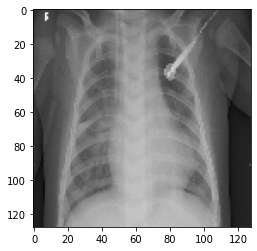

In [ ]:
d = random.randint(0,19)
c = random.randint(0,67)

images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_'+str(d)+'.npy') 
label_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_'+str(d)+'.npy')

images_2 = np.array(images_2)
label_2 = np.array(label_2)

image_e = images_2[c]
label = label_2[c]

imgplot = plt.imshow(image_e)


print('Representación de imagen enferma de entrenamiento. Lote -> '+str(d)+', Imagen ->'+str(c))
print('Forma de la imagen -> ', image_e.shape) 
print('Etiqueta de la imagen -> ', label)
plt.show()

CELDA 27 - Muestra de imagen sana de ejemplo

Representación de imagen sana de entrenamiento. Lote -> 3, Imagen ->45
Forma de la imagen ->  (128, 128, 3)
Etiqueta de la imagen -> 0


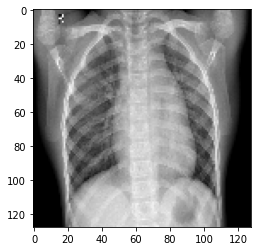

In [ ]:
a = random.randint(0,19)
b = random.randint(0,67)

images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_'+str(a)+'.npy') 
label_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_'+str(a)+'.npy')

images_1 = np.array(images_1)
label_1 = np.array(label_1)

image = images_1[b]
label = label_1[b]

imgplot = plt.imshow(image)


print('Representación de imagen sana de entrenamiento. Lote -> '+str(a)+', Imagen ->'+str(b))
print('Forma de la imagen -> ', image.shape) 
print('Etiqueta de la imagen ->', label)
plt.show()


CELDA 28 - Muestra de la reconstrucción de una imagen sana con modelo de sanas sin entrenar

Representación de la reconstrucción del autoencoder aun sin entrenar de la imagen sana de entrenamiento anteriormente mostrada. 
 Lote -> 3, Imagen -> 45
Forma de la imagen ->  (128, 128, 3)
Etiqueta de la imagen ->  0


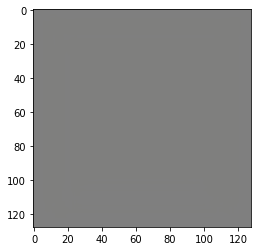

In [ ]:
no_predicted_images = autoencoder_sanas.predict(images_1)
no_predicted = no_predicted_images[b]
no_predicted_label = label_1[b]
imgplot = plt.imshow(no_predicted)


print('Representación de la reconstrucción del autoencoder aun sin entrenar de la imagen sana de entrenamiento anteriormente mostrada. \n Lote -> '+str(a)+', Imagen -> '+str(b))
print('Forma de la imagen -> ', no_predicted.shape) 
print('Etiqueta de la imagen -> ', no_predicted_label)
plt.show()

# ** Entrenamiento del modelo

NO EJECUTAR SIEMPRE

CELDA 29 - Entrenamiento del modelo autoencoder para imágenes sanas

In [ ]:
history_sanas = autoencoder_sanas.fit_generator(train_sanas_generator,
                epochs=100,
                steps_per_epoch=len(train_sanas_list_path)//32,
                )
print("Modelo de imágenes sanas entrenado con éxito")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
42/42 [==============================] - 48s 887ms/step - loss: 0.0410 - acc: 0.4314
Epoch 2/100
42/42 [==============================] - 38s 898ms/step - loss: 0.0320 - acc: 0.2638
Epoch 3/100
42/42 [==============================] - 38s 901ms/step - loss: 0.0311 - acc: 0.3489
Epoch 4/100
42/42 [==============================] - 38s 900ms/step - loss: 0.0299 - acc: 0.3305
Epoch 5/100
42/42 [==============================] - 38s 898ms/step - loss: 0.0203 - acc: 0.3936
Epoch 6/100
42/42 [==============================] - 38s 899ms/step - loss: 0.0137 - acc: 0.3305
Epoch 7/100
42/42 [==============================] - 38s 899ms/step - loss: 0.0128 - acc: 0.3456
Epoch 8/100
42/42 [==============================] - 38s 897ms/step - loss: 0.0102 - acc: 0.3275
Epoch 9/100
42/42 [==============================] - 38s 898ms/step - loss: 0.0089 - acc: 0.3474
Epoch 10/100
42/42 [==============================] - 38s 899ms/step - loss: 0.0082 - acc: 0.3357
Epoch 11/100
42/42 [=========

CELDA 30 - Entrenamiento del modelo autoencoder para imágenes enfermas

In [ ]:
history_enfermas = autoencoder_enfermas.fit_generator(train_enfermas_generator,
                epochs=100,
                steps_per_epoch=len(train_enfermas_list_path)//32
                )
print("Modelo de imágenes enfermas entrenado con éxito")

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


124/124 [==============================] - 135s 1s/step - loss: 0.0336 - acc: 0.2586
Epoch 2/100
124/124 [==============================] - 134s 1s/step - loss: 0.0243 - acc: 0.2899
Epoch 3/100
124/124 [==============================] - 134s 1s/step - loss: 0.0110 - acc: 0.3859
Epoch 4/100
124/124 [==============================] - 134s 1s/step - loss: 0.0063 - acc: 0.3876
Epoch 5/100
124/124 [==============================] - 134s 1s/step - loss: 0.0055 - acc: 0.3708
Epoch 6/100
124/124 [==============================] - 134s 1s/step - loss: 0.0049 - acc: 0.3671
Epoch 7/100
124/124 [==============================] - 134s 1s/step - loss: 0.0046 - acc: 0.3447
Epoch 8/100
124/124 [==============================] - 134s 1s/step - loss: 0.0043 - acc: 0.3599
Epoch 9/100
124/124 [==============================] - 134s 1s/step - loss: 0.0043 - acc: 0.3466
Epoch 10/100
124/124 [==============================] - 134s 1s/step - loss: 0.0039 - acc: 0.3506
Epoch 11/100
124/124 [===================

KeyboardInterrupt: ignored

# Carga de imágenes sanas y enfermas para entrenamiento

CELDA 31 - Cargamos las imágenes sanas para el entrenamiento

In [ ]:
train_images_0 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_0.npy')
train_images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_1.npy') 
train_images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_2.npy')
train_images_3 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_3.npy') 
train_images_4 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_4.npy')
train_images_5 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_5.npy') 
train_images_6 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_6.npy')
train_images_7 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_7.npy') 
train_images_8 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_8.npy')
train_images_9 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_9.npy')
train_images_10 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_10.npy')
train_images_11 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_11.npy') 
train_images_12 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_12.npy')
train_images_13 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_13.npy') 
train_images_14 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_14.npy')
train_images_15 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_15.npy') 
train_images_16 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_16.npy')
train_images_17 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_17.npy') 
train_images_18 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_18.npy')
train_images_19 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_file_19.npy') 

train_images_0 = np.array(train_images_0)
train_images_1 = np.array(train_images_1)
train_images_2 = np.array(train_images_2)
train_images_3 = np.array(train_images_3)
train_images_4 = np.array(train_images_4)
train_images_5 = np.array(train_images_5)
train_images_6 = np.array(train_images_6)
train_images_7 = np.array(train_images_7)
train_images_8 = np.array(train_images_8)
train_images_9 = np.array(train_images_9)
train_images_10 = np.array(train_images_10)
train_images_11 = np.array(train_images_11)
train_images_12 = np.array(train_images_12)
train_images_13 = np.array(train_images_13)
train_images_14 = np.array(train_images_14)
train_images_15 = np.array(train_images_15)
train_images_16 = np.array(train_images_16)
train_images_17 = np.array(train_images_17)
train_images_18 = np.array(train_images_18)
train_images_19 = np.array(train_images_19)



train_images = np.concatenate((train_images_0,train_images_1,train_images_2))
train_images = np.array(train_images)
train_images_a = np.concatenate((train_images,train_images_3,train_images_4))
train_images_a = np.array(train_images_a)
train_images_b = np.concatenate((train_images_a,train_images_5,train_images_6))
train_images_b = np.array(train_images_b)
train_images_c = np.concatenate((train_images_b,train_images_7,train_images_8))
train_images_c = np.array(train_images_c)

train_images_d = np.concatenate((train_images_c,train_images_9,train_images_10))
train_images_d = np.array(train_images_d)
train_images_e = np.concatenate((train_images_d,train_images_11,train_images_12))
train_images_e = np.array(train_images_e)
train_images_f = np.concatenate((train_images_e,train_images_13,train_images_14))
train_images_f = np.array(train_images_f)

train_images_g = np.concatenate((train_images_f,train_images_15,train_images_16))
train_images_g = np.array(train_images_g)
train_images_h = np.concatenate((train_images_g,train_images_17,train_images_18))
train_images_h = np.array(train_images_h)

train_sanas_images_total = np.concatenate((train_images_h,train_images_19))
train_sanas_images_total = np.array(train_sanas_images_total)


train_sanas_images_total = train_sanas_images_total / 255.

print(len(train_sanas_images_total), "imágenes sanas de entrenamiento cargadas correctamente")

1340 imágenes sanas de entrenamiento cargadas correctamente


CELDA 32 - Cargamos las imágenes enfermas para el entrenamiento

In [ ]:
train_images_0 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_0.npy')
train_images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_1.npy') 
train_images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_2.npy')
train_images_3 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_3.npy') 
train_images_4 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_4.npy')
train_images_5 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_5.npy') 
train_images_6 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_6.npy')
train_images_7 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_7.npy') 
train_images_8 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_8.npy')
train_images_9 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_9.npy')
train_images_10 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_10.npy')
train_images_11 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_11.npy') 
train_images_12 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_12.npy')
train_images_13 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_13.npy') 
train_images_14 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_14.npy')
train_images_15 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_15.npy') 
train_images_16 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_16.npy')
train_images_17 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_17.npy') 
train_images_18 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_18.npy')
train_images_19 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_file_19.npy') 

train_images_0 = np.array(train_images_0)
train_images_1 = np.array(train_images_1)
train_images_2 = np.array(train_images_2)
train_images_3 = np.array(train_images_3)
train_images_4 = np.array(train_images_4)
train_images_5 = np.array(train_images_5)
train_images_6 = np.array(train_images_6)
train_images_7 = np.array(train_images_7)
train_images_8 = np.array(train_images_8)
train_images_9 = np.array(train_images_9)
train_images_10 = np.array(train_images_10)
train_images_11 = np.array(train_images_11)
train_images_12 = np.array(train_images_12)
train_images_13 = np.array(train_images_13)
train_images_14 = np.array(train_images_14)
train_images_15 = np.array(train_images_15)
train_images_16 = np.array(train_images_16)
train_images_17 = np.array(train_images_17)
train_images_18 = np.array(train_images_18)
train_images_19 = np.array(train_images_19)



train_images = np.concatenate((train_images_0,train_images_1,train_images_2))
train_images = np.array(train_images)
train_images_a = np.concatenate((train_images,train_images_3,train_images_4))
train_images_a = np.array(train_images_a)
train_images_b = np.concatenate((train_images_a,train_images_5,train_images_6))
train_images_b = np.array(train_images_b)
train_images_c = np.concatenate((train_images_b,train_images_7,train_images_8))
train_images_c = np.array(train_images_c)

train_images_d = np.concatenate((train_images_c,train_images_9,train_images_10))
train_images_d = np.array(train_images_d)
train_images_e = np.concatenate((train_images_d,train_images_11,train_images_12))
train_images_e = np.array(train_images_e)
train_images_f = np.concatenate((train_images_e,train_images_13,train_images_14))
train_images_f = np.array(train_images_f)

train_images_g = np.concatenate((train_images_f,train_images_15,train_images_16))
train_images_g = np.array(train_images_g)
train_images_h = np.concatenate((train_images_g,train_images_17,train_images_18))
train_images_h = np.array(train_images_h)

train_enfermas_images_total = np.concatenate((train_images_h,train_images_19))
train_enfermas_images_total = np.array(train_enfermas_images_total)


train_enfermas_images_total = train_enfermas_images_total / 255.

print(len(train_enfermas_images_total), "imágenes enfermas de entrenamiento cargadas correctamente")

1360 imágenes enfermas de entrenamiento cargadas correctamente


# Carga de etiquetas sanas y enfermas para entrenamiento

CELDA 33 - Cargamos las etiquetas sanas para el entrenamiento

In [ ]:
train_images_0 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_0.npy')
train_images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_1.npy') 
train_images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_2.npy')
train_images_3 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_3.npy') 
train_images_4 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_4.npy')
train_images_5 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_5.npy') 
train_images_6 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_6.npy')
train_images_7 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_7.npy') 
train_images_8 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_8.npy')
train_images_9 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_9.npy')
train_images_10 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_10.npy')
train_images_11 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_11.npy') 
train_images_12 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_12.npy')
train_images_13 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_13.npy') 
train_images_14 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_14.npy')
train_images_15 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_15.npy') 
train_images_16 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_16.npy')
train_images_17 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_17.npy') 
train_images_18 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_18.npy')
train_images_19 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_normal_image_label_file_19.npy') 

train_images_0 = np.array(train_images_0)
train_images_1 = np.array(train_images_1)
train_images_2 = np.array(train_images_2)
train_images_3 = np.array(train_images_3)
train_images_4 = np.array(train_images_4)
train_images_5 = np.array(train_images_5)
train_images_6 = np.array(train_images_6)
train_images_7 = np.array(train_images_7)
train_images_8 = np.array(train_images_8)
train_images_9 = np.array(train_images_9)
train_images_10 = np.array(train_images_10)
train_images_11 = np.array(train_images_11)
train_images_12 = np.array(train_images_12)
train_images_13 = np.array(train_images_13)
train_images_14 = np.array(train_images_14)
train_images_15 = np.array(train_images_15)
train_images_16 = np.array(train_images_16)
train_images_17 = np.array(train_images_17)
train_images_18 = np.array(train_images_18)
train_images_19 = np.array(train_images_19)



train_images = np.concatenate((train_images_0,train_images_1,train_images_2))
train_images = np.array(train_images)
train_images_a = np.concatenate((train_images,train_images_3,train_images_4))
train_images_a = np.array(train_images_a)
train_images_b = np.concatenate((train_images_a,train_images_5,train_images_6))
train_images_b = np.array(train_images_b)
train_images_c = np.concatenate((train_images_b,train_images_7,train_images_8))
train_images_c = np.array(train_images_c)

train_images_d = np.concatenate((train_images_c,train_images_9,train_images_10))
train_images_d = np.array(train_images_d)
train_images_e = np.concatenate((train_images_d,train_images_11,train_images_12))
train_images_e = np.array(train_images_e)
train_images_f = np.concatenate((train_images_e,train_images_13,train_images_14))
train_images_f = np.array(train_images_f)

train_images_g = np.concatenate((train_images_f,train_images_15,train_images_16))
train_images_g = np.array(train_images_g)
train_images_h = np.concatenate((train_images_g,train_images_17,train_images_18))
train_images_h = np.array(train_images_h)

train_sanas_images_label_total = np.concatenate((train_images_h,train_images_19))
train_sanas_images_label_total = np.array(train_sanas_images_label_total)


#train_sanas_images_label_total = train_sanas_images_label_total / 255.

print(len(train_sanas_images_label_total), "etiquetas de imágenes sanas de entrenamiento cargadas correctamente")

1340 etiquetas de imágenes sanas de entrenamiento cargadas correctamente


CELDA 34 - Cargamos las etiquetas enfermas para el entrenamiento

In [ ]:
train_images_0 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_0.npy')
train_images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_1.npy') 
train_images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_2.npy')
train_images_3 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_3.npy') 
train_images_4 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_4.npy')
train_images_5 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_5.npy') 
train_images_6 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_6.npy')
train_images_7 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_7.npy') 
train_images_8 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_8.npy')
train_images_9 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_9.npy')
train_images_10 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_10.npy')
train_images_11 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_11.npy') 
train_images_12 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_12.npy')
train_images_13 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_13.npy') 
train_images_14 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_14.npy')
train_images_15 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_15.npy') 
train_images_16 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_16.npy')
train_images_17 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_17.npy') 
train_images_18 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_18.npy')
train_images_19 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/train_enferma_image_label_file_19.npy') 

train_images_0 = np.array(train_images_0)
train_images_1 = np.array(train_images_1)
train_images_2 = np.array(train_images_2)
train_images_3 = np.array(train_images_3)
train_images_4 = np.array(train_images_4)
train_images_5 = np.array(train_images_5)
train_images_6 = np.array(train_images_6)
train_images_7 = np.array(train_images_7)
train_images_8 = np.array(train_images_8)
train_images_9 = np.array(train_images_9)
train_images_10 = np.array(train_images_10)
train_images_11 = np.array(train_images_11)
train_images_12 = np.array(train_images_12)
train_images_13 = np.array(train_images_13)
train_images_14 = np.array(train_images_14)
train_images_15 = np.array(train_images_15)
train_images_16 = np.array(train_images_16)
train_images_17 = np.array(train_images_17)
train_images_18 = np.array(train_images_18)
train_images_19 = np.array(train_images_19)



train_images = np.concatenate((train_images_0,train_images_1,train_images_2))
train_images = np.array(train_images)
train_images_a = np.concatenate((train_images,train_images_3,train_images_4))
train_images_a = np.array(train_images_a)
train_images_b = np.concatenate((train_images_a,train_images_5,train_images_6))
train_images_b = np.array(train_images_b)
train_images_c = np.concatenate((train_images_b,train_images_7,train_images_8))
train_images_c = np.array(train_images_c)

train_images_d = np.concatenate((train_images_c,train_images_9,train_images_10))
train_images_d = np.array(train_images_d)
train_images_e = np.concatenate((train_images_d,train_images_11,train_images_12))
train_images_e = np.array(train_images_e)
train_images_f = np.concatenate((train_images_e,train_images_13,train_images_14))
train_images_f = np.array(train_images_f)

train_images_g = np.concatenate((train_images_f,train_images_15,train_images_16))
train_images_g = np.array(train_images_g)
train_images_h = np.concatenate((train_images_g,train_images_17,train_images_18))
train_images_h = np.array(train_images_h)

train_enfermas_images_label_total = np.concatenate((train_images_h,train_images_19))
train_enfermas_images_label_total = np.array(train_enfermas_images_label_total)


#train_enfermas_images_label_total = train_enfermas_images_label_total / 255.

print(len(train_enfermas_images_label_total), "etiquetas de imágenes enfermas de entrenamiento cargadas correctamente")

1360 etiquetas de imágenes enfermas de entrenamiento cargadas correctamente


# Guardar modelo separado (Encoder, Decoder, Autoencoder)

GUARDADO DEL MODELO SEPARADO

CELDA 35 - Guardado del modelo separado ya entrenado para imágenes sanas

In [ ]:
# serializa el modelo para JSON
num_modelo_a_guardar = "PRUEBA"
num_modelo_a_guardar = str(num_modelo_a_guardar)
path_modelo_a_guardar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Autoencoder_Sanas_"+num_modelo_a_guardar+".json"
path_peso_a_guardar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Autoencoder_Sanas_"+num_modelo_a_guardar+".h5"
path_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Encoder_Sanas_"+num_modelo_a_guardar+".json"
peso_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Encoder_Sanas_"+num_modelo_a_guardar+".h5"
path_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Decoder_Sanas_"+num_modelo_a_guardar+".json"
peso_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Decoder_Sanas_"+num_modelo_a_guardar+".h5"

model_json_encoder_sanas = encoder_sanas.to_json()

model_json_decoder_sanas = decoder_sanas.to_json()

model_json_autoencoder_sanas = autoencoder_sanas.to_json()

with open(path_encoder, "w") as json_file:
  json_file.write(model_json_encoder_sanas)
#serializan los pesos (weights) para HDF5
encoder_sanas.save_weights(peso_encoder)
encoder_sanas.summary()
print("Modelo Encoder para sanas, guardado en el PC")

with open(path_decoder, "w") as json_file:
  json_file.write(model_json_decoder_sanas)
#serializan los pesos (weights) para HDF5
decoder_sanas.save_weights(peso_decoder)
decoder_sanas.summary()
print("Modelo Decoder para sanas, guardado en el PC")

with open(path_modelo_a_guardar, "w") as json_file:
  json_file.write(model_json_autoencoder_sanas)
#serializan los pesos (weights) para HDF5
autoencoder_sanas.save_weights(path_peso_a_guardar)
autoencoder_sanas.summary()
print("Modelo Autoencoder para sanas, guardado en el PC")

# despues...


Model: "encoder_model_sanas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_64 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_65 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 conv2d_67 (Conv2D)          (None, 64, 64, 64)        36928     
                                               

CELDA 36 - Guardado del modelo separado ya entrenado para imágenes enfermas

In [ ]:
# serializa el modelo para JSON
num_modelo_a_guardar = "PRUEBA"
num_modelo_a_guardar = str(num_modelo_a_guardar)
path_modelo_a_guardar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Autoencoder_Enfermas_"+num_modelo_a_guardar+".json"
path_peso_a_guardar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Autoencoder_Enfermas_"+num_modelo_a_guardar+".h5"
path_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Encoder_Enfermas_"+num_modelo_a_guardar+".json"
peso_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Encoder_Enfermas_"+num_modelo_a_guardar+".h5"
path_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Decoder_Enfermas_"+num_modelo_a_guardar+".json"
peso_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Decoder_Enfermas_"+num_modelo_a_guardar+".h5"

model_json_encoder_enfermas = encoder_enfermas.to_json()

model_json_decoder_enfermas = decoder_enfermas.to_json()

model_json_autoencoder_enfermas = autoencoder_enfermas.to_json()


with open(path_encoder, "w") as json_file:
  json_file.write(model_json_encoder_enfermas)
#serializan los pesos (weights) para HDF5
encoder_enfermas.save_weights(peso_encoder)
encoder_enfermas.summary()
print("Modelo Encoder para enfermas, guardado en el PC")

with open(path_decoder, "w") as json_file:
  json_file.write(model_json_decoder_enfermas)
#serializan los pesos (weights) para HDF5
decoder_enfermas.save_weights(peso_decoder)
decoder_enfermas.summary()
print("Modelo Decoder para enfermas, guardado en el PC")

with open(path_modelo_a_guardar, "w") as json_file:
  json_file.write(model_json_autoencoder_enfermas)
#serializan los pesos (weights) para HDF5
autoencoder_enfermas.save_weights(path_peso_a_guardar)
autoencoder_enfermas.summary()
print("Modelo Autoencoder para enfermas, guardado en el PC")

# despues...


Model: "encoder_model_enfermas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_87 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_88 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 conv2d_89 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 64, 64, 64)        73792     
                                            

# Cargar modelo separado (Encoder, Decoder, Autoencoder)

CARGADO DEL MODELO SEPARADO

In [ ]:
num_modelo_a_cargar = "2"
num_modelo_a_cargar = str(num_modelo_a_cargar)

CELDA 37 - Carga del modelo separado ya entrenado para imágenes sanas

In [ ]:

path_modelo_a_cargar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Autoencoder_Sanas_"+num_modelo_a_cargar+".json"
path_peso_a_cargar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Autoencoder_Sanas_"+num_modelo_a_cargar+".h5"
path_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Encoder_Sanas_"+num_modelo_a_cargar+".json"
peso_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Encoder_Sanas_"+num_modelo_a_cargar+".h5"
path_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Decoder_Sanas_"+num_modelo_a_cargar+".json"
peso_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Sanos/Modelo_Decoder_Sanas_"+num_modelo_a_cargar+".h5"

# carga el json y crea el modelo
json_file = open(path_encoder, 'r')
loaded_model_json = json_file.read()

json_file_a = open(path_decoder, 'r')
loaded_model_json_a = json_file_a.read()

json_file_b = open(path_modelo_a_cargar, 'r')
loaded_model_json_b = json_file_b.read()

json_file.close()
json_file_a.close()
json_file_b.close()

encoder_cargado_sanas = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
encoder_cargado_sanas.load_weights(peso_encoder)
print("Modelo cargado desde el PC")
encoder_cargado_sanas.summary()

decoder_cargado_sanas = model_from_json(loaded_model_json_a)
# se cargan los pesos (weights) en el nuevo modelo
decoder_cargado_sanas.load_weights(peso_decoder)
print("Modelo cargado desde el PC")
decoder_cargado_sanas.summary()

autoencoder_cargado_sanas = model_from_json(loaded_model_json_b)
# se cargan los pesos (weights) en el nuevo modelo
autoencoder_cargado_sanas.load_weights(path_peso_a_cargar)
print("Modelo cargado desde el PC")
autoencoder_cargado_sanas.summary()


Modelo cargado desde el PC
Model: "encoder_model_sanas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                    

CELDA 38 - Carga del modelo separado ya entrenado para imágenes enfermas

In [ ]:

path_modelo_a_cargar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Autoencoder_Enfermas_"+num_modelo_a_cargar+".json"
path_peso_a_cargar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Autoencoder_Enfermas_"+num_modelo_a_cargar+".h5"
path_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Encoder_Enfermas_"+num_modelo_a_cargar+".json"
peso_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Encoder_Enfermas_"+num_modelo_a_cargar+".h5"
path_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Decoder_Enfermas_"+num_modelo_a_cargar+".json"
peso_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Enfermos/Modelo_Decoder_Enfermas_"+num_modelo_a_cargar+".h5"

# carga el json y crea el modelo
json_file = open(path_encoder, 'r')
loaded_model_json = json_file.read()

json_file_a = open(path_decoder, 'r')
loaded_model_json_a = json_file_a.read()

json_file_b = open(path_modelo_a_cargar, 'r')
loaded_model_json_b = json_file_b.read()

json_file.close()
json_file_a.close()
json_file_b.close()

encoder_cargado_enfermas = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
encoder_cargado_enfermas.load_weights(peso_encoder)
print("Modelo cargado desde el PC")
encoder_cargado_enfermas.summary()

decoder_cargado_enfermas = model_from_json(loaded_model_json_a)
# se cargan los pesos (weights) en el nuevo modelo
decoder_cargado_enfermas.load_weights(peso_decoder)
print("Modelo cargado desde el PC")
decoder_cargado_enfermas.summary()

autoencoder_cargado_enfermas = model_from_json(loaded_model_json_b)
# se cargan los pesos (weights) en el nuevo modelo
autoencoder_cargado_enfermas.load_weights(path_peso_a_cargar)
print("Modelo cargado desde el PC")
autoencoder_cargado_enfermas.summary()


Modelo cargado desde el PC
Model: "encoder_model_enfermas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_39 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 128)       147584    
                 

# Pruebas sobre modelo autoencoder completo SANAS

PRUEBA DEL MODELO AUTOENCODER COMPLETO

CELDA 39 - Resumen del modelo cargado y pruebas iniciales para sanas

Vamos a calcular el MSE del modelo SANAS sobre las imágenes de entrenamiento de SANAS

In [ ]:
predicted_sanas_entrenamiento = autoencoder_cargado_sanas.predict(train_sanas_images_total)
error_e = 0
acum = 0
for i in range(len(predicted_sanas_entrenamiento)):
  imagen_a = train_sanas_images_total[i]
  imagen_b = predicted_sanas_entrenamiento[i]
  error = np.square(np.subtract(imagen_a, imagen_b)).mean()
  #print(error)
  error_e = error_e + error
  #print(error_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

media_sanas_entrenamiento = error_e / acum
print("El error cuadratico medio de la reconstrucción de todas las imágenes sanas de entrenamiento es --> ", error_e, " / ", acum, " = ", media_sanas_entrenamiento)

El error cuadratico medio de la reconstrucción de todas las imágenes sanas de entrenamiento es -->  2.7513570423359672  /  1340  =  0.002053251524131319


Ahora se procede a cargar las imágenes SANAS de pruebas y mostras algunos valores útiles de una imagen aleatoria.

In [ ]:
test_sanas_images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_file_0.npy')
test_sanas_images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_file_1.npy')
test_sanas_images_1 = np.array(test_sanas_images_1)
test_sanas_images_2 = np.array(test_sanas_images_2)

print("Resumen del modelo cargado para probar")
#encoder_cargado_sanas.summary()
#decoder_cargado_sanas.summary()
#autoencoder_cargado_sanas.summary()

test_sanas_images_totales = np.concatenate((test_sanas_images_1, test_sanas_images_2))

print("Número de imagenes sanas totales de prueba --> ", len(test_sanas_images_totales))

num_a = random.randint(0, len(test_sanas_images_totales)-1)

print("Número de la imagen elegida --> ", num_a)

#smallest = np.min(test_sanas_images[num])
#biggest = np.max(test_sanas_images[num])
#print("Valor de pixel mas alto sin preproceso --> ",biggest)
#print("Valor de pixel mas bajo sin prerpoceso --> ",smallest)

test_sanas_images_totales = test_sanas_images_totales / 255.

smallest = np.min(test_sanas_images_totales[num_a])
biggest = np.max(test_sanas_images_totales[num_a])
print("Valor de pixel mas alto original --> ",biggest)
print("Valor de pixel mas bajo original --> ",smallest)


#predicted_sanas_images = autoencoder_sanas.predict(test_sanas_images_totales)
predicted_sanas_images = autoencoder_cargado_sanas.predict(test_sanas_images_totales)


smallest = np.min(predicted_sanas_images[num_a])
biggest = np.max(predicted_sanas_images[num_a])
print("Valor de pixel mas alto reconstruido --> ",biggest)
print("Valor de pixel mas bajo reconstruido --> ",smallest)

#predicted_images = predicted_images * 255

#smallest = np.min(predicted_images[num])
#biggest = np.max(predicted_images[num])
#print("Valor de pixel mas alto con preproceso --> ",biggest)
#print("Valor de pixel mas bajo con prerpoceso --> ",smallest)

#predicted_images = postprocess(predicted_images)
#print(len(predicted_images))
print("Forma de imágenes reconstruidas --> ", predicted_sanas_images.shape)

Resumen del modelo cargado para probar
Número de imagenes sanas totales de prueba -->  234
Número de la imagen elegida -->  112
Valor de pixel mas alto original -->  0.996078431372549
Valor de pixel mas bajo original -->  0.0
Valor de pixel mas alto reconstruido -->  0.86797667
Valor de pixel mas bajo reconstruido -->  2.435772e-09
Forma de imágenes reconstruidas -->  (234, 128, 128, 3)


CELDA 40 - Representación de imagen sana original

Número de imagen mostrada (ORIGINAL) -->  112
Valor de pixel mas alto original -->  0.996078431372549
Valor de pixel mas bajo original -->  0.0


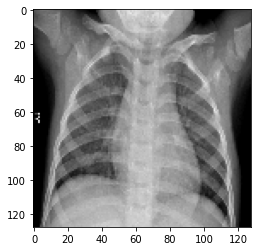

In [ ]:
print("Número de imagen mostrada (ORIGINAL) --> ", num_a)

plt.imshow(test_sanas_images_totales[num_a])

smallest = np.min(test_sanas_images_totales[num_a])
biggest = np.max(test_sanas_images_totales[num_a])
print("Valor de pixel mas alto original --> ",biggest)
print("Valor de pixel mas bajo original --> ",smallest)

CELDA 41 - Representación de imagen sana reconstruida

Número de imagen mostrada (RECONSTRUCCIÓN) -->  112
Valor de pixel mas alto reconstrucción -->  0.86797667
Valor de pixel mas bajo reconstrucción -->  2.435772e-09


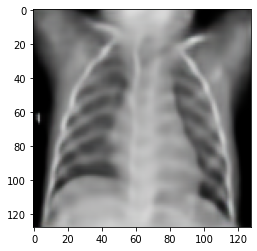

In [ ]:
print("Número de imagen mostrada (RECONSTRUCCIÓN) --> ", num_a)

plt.imshow(predicted_sanas_images[num_a])

smallest = np.min(predicted_sanas_images[num_a])
biggest = np.max(predicted_sanas_images[num_a])
print("Valor de pixel mas alto reconstrucción --> ",biggest)
print("Valor de pixel mas bajo reconstrucción --> ",smallest)

CELDA 42 - Error cuadrático medio de la imagen anterior

In [ ]:
mse = np.square(np.subtract(test_sanas_images_totales[num_a], predicted_sanas_images[num_a])).mean()
print("El error cuadrático medio o (MSE) obtenido al comparar la imagen original y la reconstruida es de --> ", mse)

El error cuadrático medio o (MSE) obtenido al comparar la imagen original y la reconstruida es de -->  0.0019636372661528093


CELDA 43 - Similitud estructural de la imagen anterior

In [ ]:
imagen_a = test_sanas_images_totales[num_a]
imagen_res = predicted_sanas_images[num_a]
ssima = ssim(imagen_a, imagen_res, multichannel=True, data_range=predicted_sanas_images[num_a].max() - predicted_sanas_images[num_a].min())
print('Structural Similarity:', ssima)

Structural Similarity: 0.7829121899434294


CELDA 44 - Presentación de varias (30) imágenes sanas originales de prueba

IMAGENES ORIGINALES
234


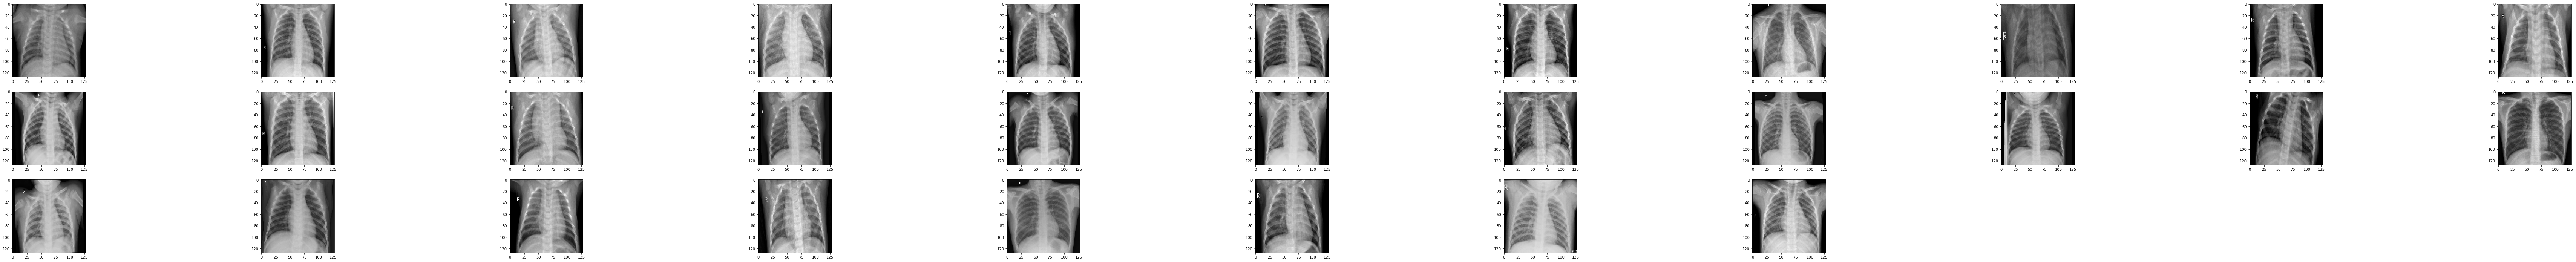

In [ ]:
print("IMAGENES ORIGINALES")
plt.figure(figsize=(128, 128))
print(len(test_sanas_images_totales))
for i in range(30):
    # display original images
    ax = plt.subplot(30,11, i + 1)
    imagen = test_sanas_images_totales[i]
    plt.imshow(imagen)

CELDA 45 - Presentación de varias (30) imágenes sanas reconstruidas

IMAGENES RECONSTRUIDAS
234


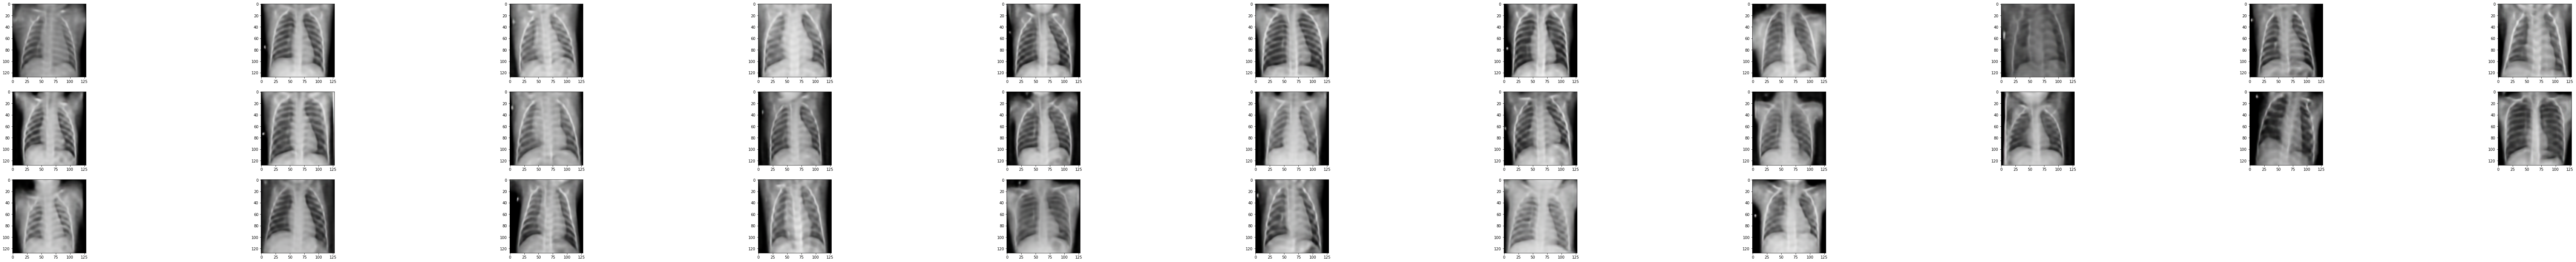

In [ ]:
print("IMAGENES RECONSTRUIDAS")
plt.figure(figsize=(128, 128))
print(len(predicted_sanas_images))
for i in range(30):
    # display predicted images
    ax = plt.subplot(30,11, i + 1)
    imagen = predicted_sanas_images[i]
    plt.imshow(imagen)

CELDA 46 - Error cuadrático medio del total de imágenes sanas de prueba

In [ ]:
error_e = 0
acum = 0
for i in range(len(predicted_sanas_images)):
  imagen_a = test_sanas_images_totales[i]
  imagen_b = predicted_sanas_images[i]
  error = np.square(np.subtract(imagen_a, imagen_b)).mean()
  #print(error)
  error_e = error_e + error
  #print(error_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

media = error_e / acum
print("El error cuadratico medio de la reconstrucción de todas las imágenes sanas de prueba es --> ", error_e, " / ", acum, " = ", media)

El error cuadratico medio de la reconstrucción de todas las imágenes sanas de prueba es -->  0.461657442088665  /  234  =  0.0019728950516609617


CELDA 47 - Similitud estructural media del total de imágenes sanas de prueba

In [ ]:
ssima_e = 0
acum = 0
for i in range(len(predicted_sanas_images)):
  imagen_a = test_sanas_images_totales[i]
  imagen_b = predicted_sanas_images[i]
  ssima = ssim(imagen_a, imagen_b, multichannel=True, data_range=predicted_sanas_images[i].max() - predicted_sanas_images[i].min())
  #print(ssima)
  ssima_e = ssima_e + ssima
  #print(ssima_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

media = ssima_e / acum
print("La similitud estructural media entre las imágenes sanas de prueba originales y sus reconstrucciones es de --> ", ssima_e, " / ", acum, " = ", media)


La similitud estructural media entre las imágenes sanas de prueba originales y sus reconstrucciones es de -->  184.1852087527393  /  234  =  0.7871162767211081


# Pruebas sobre modelo autoencoder completo ENFERMAS

Vamos a calcular el MSE del modelo ENFERMAS sobre las imágenes de entrenamiento de ENFERMAS

In [ ]:
predicted_enfermas_entrenamiento = autoencoder_cargado_enfermas.predict(train_enfermas_images_total)
error_e = 0
acum = 0
for i in range(len(predicted_enfermas_entrenamiento)):
  imagen_a = train_enfermas_images_total[i]
  imagen_b = predicted_enfermas_entrenamiento[i]
  error = np.square(np.subtract(imagen_a, imagen_b)).mean()
  #print(error)
  error_e = error_e + error
  #print(error_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

media_enfermas_entrenamiento = error_e / acum
print("El error cuadratico medio de la reconstrucción de todas las imágenes enfermas de entrenamiento es --> ", error_e, " / ", acum, " = ", media_enfermas_entrenamiento)

El error cuadratico medio de la reconstrucción de todas las imágenes enfermas de entrenamiento es -->  1.271514987971545  /  1360  =  0.0009349374911555478


CELD 48 - Ahora se procede a cargar las imágenes ENFERMAS de prueba y mostrar algunos valores útiles de una imagen aleatoria.

In [ ]:
test_enfermas_images_1 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_file_0.npy')
test_enfermas_images_2 = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_file_1.npy')
test_enfermas_images_1 = np.array(test_enfermas_images_1)
test_enfermas_images_2 = np.array(test_enfermas_images_2)


print("Resumen del modelo cargado para probar")
#encoder_cargado_enfermas.summary()
#decoder_cargado_enfermas.summary()
#autoencoder_cargado_enfermas.summary

test_enfermas_images_totales = np.concatenate((test_enfermas_images_1, test_enfermas_images_2))

print("Número de imagenes enfermas de prueba --> ", len(test_enfermas_images_totales))

num_a = random.randint(0, len(test_enfermas_images_totales)-1)
print("Número de la imagen elegida -->", num_a)
test_enfermas_images_totales = test_enfermas_images_totales / 255.

smallest = np.min(test_enfermas_images_totales[num_a])
biggest = np.max(test_enfermas_images_totales[num_a])
print("Valor de pixel mas alto original --> ",biggest)
print("Valor de pixel mas bajo original --> ",smallest)


#predicted_enfermas_images = autoencoder_enfermas.predict(test_enfermas_images_totales)
predicted_enfermas_images = autoencoder_cargado_enfermas.predict(test_enfermas_images_totales)

smallest = np.min(predicted_enfermas_images[num_a])
biggest = np.max(predicted_enfermas_images[num_a])
print("Valor de pixel mas alto reconstruido --> ",biggest)
print("Valor de pixel mas bajo reconstruido --> ",smallest)

#predicted_images = predicted_images * 255

#smallest = np.min(predicted_images[num])
#biggest = np.max(predicted_images[num])
#print("Valor de pixel mas alto con preproceso --> ",biggest)
#print("Valor de pixel mas bajo con prerpoceso --> ",smallest)

#predicted_images = postprocess(predicted_images)
#print(len(predicted_images))
print("Forma de imágenes reconstruidas --> ", predicted_enfermas_images.shape)

Resumen del modelo cargado para probar
Número de imagenes enfermas de prueba -->  234
Número de la imagen elegida --> 56
Valor de pixel mas alto original -->  1.0
Valor de pixel mas bajo original -->  0.0
Valor de pixel mas alto reconstruido -->  0.8891757
Valor de pixel mas bajo reconstruido -->  1.1945862e-10
Forma de imágenes reconstruidas -->  (234, 128, 128, 3)


CELDA 49 - Representación de imagen enferma original

Número de imagen mostrada (ORIGINAL) -->  56
Valor de pixel mas alto original -->  1.0
Valor de pixel mas bajo original -->  0.0


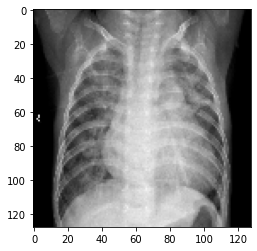

In [ ]:
print("Número de imagen mostrada (ORIGINAL) --> ", num_a)

plt.imshow(test_enfermas_images_totales[num_a])

smallest = np.min(test_enfermas_images_totales[num_a])
biggest = np.max(test_enfermas_images_totales[num_a])
print("Valor de pixel mas alto original --> ",biggest)
print("Valor de pixel mas bajo original --> ",smallest)

CELDA 50 - Representación de imagen enferma reconstruida

Número de imagen mostrada (RECONSTRUCCIÓN) -->  56
Valor de pixel mas alto reconstrucción -->  0.8891757
Valor de pixel mas bajo reconstrucción -->  1.1945862e-10


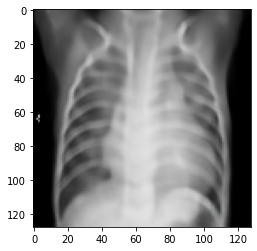

In [ ]:
print("Número de imagen mostrada (RECONSTRUCCIÓN) --> ", num_a)

plt.imshow(predicted_enfermas_images[num_a])

smallest = np.min(predicted_enfermas_images[num_a])
biggest = np.max(predicted_enfermas_images[num_a])
print("Valor de pixel mas alto reconstrucción --> ",biggest)
print("Valor de pixel mas bajo reconstrucción --> ",smallest)

CELDA 51 - Error cuadrático medio de la imagen anterior

In [ ]:
mse = np.square(np.subtract(test_enfermas_images_totales[num_a], predicted_enfermas_images[num_a])).mean()
print("MSE:", mse)

MSE: 0.0011935431847407408


CELDA 52 - Similitud estructural  de la imagen anterior

In [ ]:
imagen_a = test_enfermas_images_totales[num_a]
imagen_a = np.array(imagen_a)

imagen_res = predicted_enfermas_images[num_a]
imagen_res = np.array(imagen_res)
ssima = ssim(imagen_a, imagen_res, multichannel=True, data_range=predicted_enfermas_images[num_a].max() - predicted_enfermas_images[num_a].min())
print('Structural Similarity:', ssima)

Structural Similarity: 0.8432894396739911


CELDA 53 - Presentación de varias (30) imágenes enfermas de prueba originales

IMAGENES ORIGINALES
234


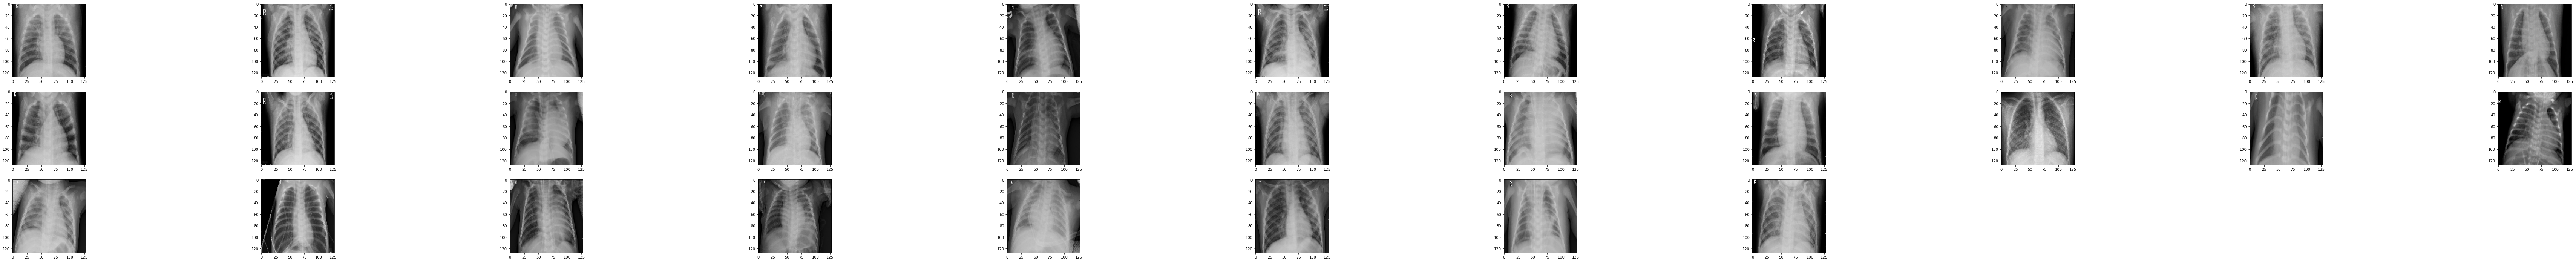

In [ ]:
print("IMAGENES ORIGINALES")
plt.figure(figsize=(128, 128))
print(len(test_enfermas_images_totales))
for i in range(30):
    # display original images
    ax = plt.subplot(30,11, i + 1)
    imagen = test_enfermas_images_totales[i]
    plt.imshow(imagen)

CELDA 54 - Presentación de varias (30) imágenes enfermas reconstruidas

IMAGENES RECONSTRUIDAS
234


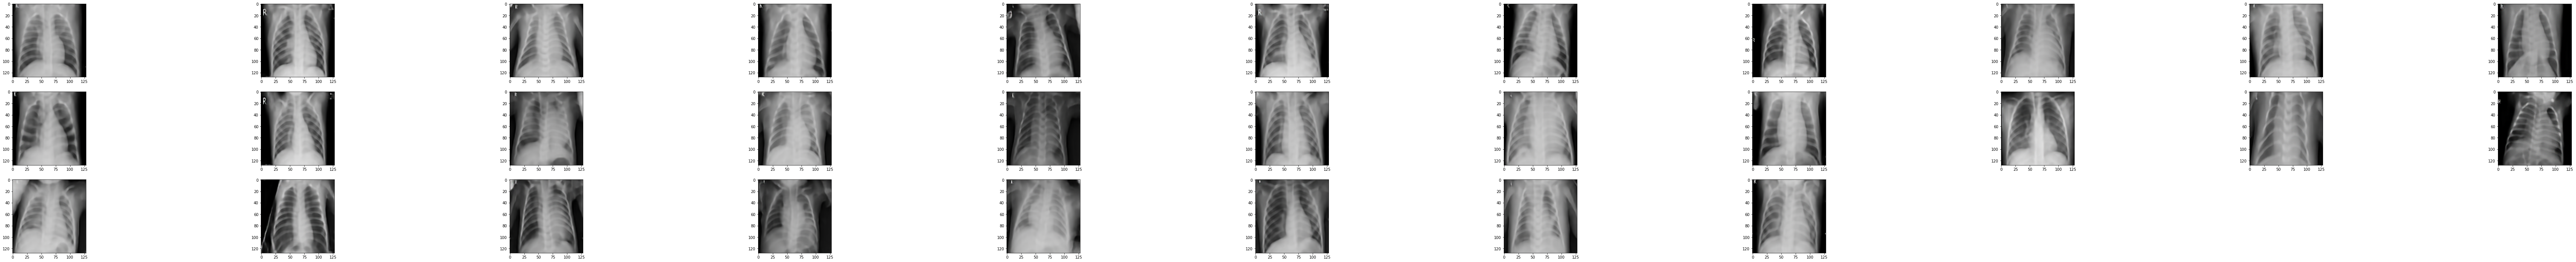

In [ ]:
print("IMAGENES RECONSTRUIDAS")
plt.figure(figsize=(128, 128))
print(len(predicted_enfermas_images))
for i in range(30):
    # display predicted images
    ax = plt.subplot(30,11, i + 1)
    imagen = predicted_enfermas_images[i]
    plt.imshow(imagen)

CELDA 55 - Error cuadrático medio del total de imágenes enfermas de prueba

In [ ]:
error_e = 0
acum = 0
for i in range(len(predicted_enfermas_images)):
  imagen_a = test_enfermas_images_totales[i]
  imagen_b = predicted_enfermas_images[i]
  error = np.square(np.subtract(imagen_a, imagen_b)).mean()
  #print(error)
  error_e = error_e + error
  #print(error_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

media = error_e / acum
print("El error cuadratico medio de la reconstrucción de todas las imágenes enfermas de prueba es --> ", error_e, " / ", acum, " = ", media)

El error cuadratico medio de la reconstrucción de todas las imágenes enfermas de prueba es -->  0.2254929655091417  /  234  =  0.0009636451517484688


CELDA 56 - Similitud estructural medio del total de imágenes enfermas de prueba

In [ ]:
ssima_e = 0
acum = 0
for i in range(len(predicted_enfermas_images)):
  imagen_a = test_enfermas_images_totales[i]
  imagen_b = predicted_enfermas_images[i]
  ssima = ssim(imagen_a, imagen_b, multichannel=True, data_range=predicted_enfermas_images[i].max() - predicted_enfermas_images[i].min())
  #print(ssima)
  ssima_e = ssima_e + ssima
  #print(ssima_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

media = ssima_e / acum
print("La similitud estructural media entre las imágenes enfermas originales y sus reconstrucciones es de --> ", ssima_e, " / ", acum, " = ", media)


La similitud estructural media entre las imágenes enfermas originales y sus reconstrucciones es de -->  204.85601562018678  /  234  =  0.8754530582059264


# Carga de imágenes y etiquetas para pruebas (Sanas y Enfermas)

CELDA 57 - Carga de imágenes/etiquetas sanas y enfermas para las pruebas

In [ ]:
imagenes_a = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_file_0.npy')
label_a = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_label_file_0.npy')
imagenes_b = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_file_1.npy')
label_b = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_enferma_image_label_file_1.npy')
imagenes_c = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_file_0.npy')
label_c = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_label_file_0.npy')
imagenes_d = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_file_1.npy')
label_d = np.load('/content/drive/My Drive/Colab Notebooks/TFG/test_normal_image_label_file_1.npy')

imagenes_a = np.array(imagenes_a)
label_a = np.array(label_a)
imagenes_b = np.array(imagenes_b)
label_b = np.array(label_b)
imagenes_c = np.array(imagenes_c)
label_c = np.array(label_c)
imagenes_d = np.array(imagenes_d)
label_d = np.array(label_d)

imagenes_1 = np.concatenate((imagenes_a,imagenes_b,imagenes_c))
imagenes_1 = np.array(imagenes_1)
imagenes_2 = np.concatenate((imagenes_1, imagenes_d))
imagenes_2 = np.array(imagenes_2)
imagenes_sanas_enfermas_totales = shuffle(imagenes_2)
imagenes_sanas_enfermas_totales = imagenes_sanas_enfermas_totales / 255.0

label_1 = np.concatenate((label_a,label_b,label_c))
label_1 = np.array(label_1)
label_2 = np.concatenate((label_1, label_d))
label_2 = np.array(label_2)
label_sanas_enfermas_totales = shuffle(label_2)


num = random.randint(0,467)

print(len(imagenes_sanas_enfermas_totales))
print(len(label_sanas_enfermas_totales))

print(imagenes_sanas_enfermas_totales[num])
print(imagenes_sanas_enfermas_totales[num].shape)
print(label_sanas_enfermas_totales[num])

468
468
[[[0.05098039 0.05098039 0.05098039]
  [0.0627451  0.0627451  0.0627451 ]
  [0.07058824 0.07058824 0.07058824]
  ...
  [0.01960784 0.01960784 0.01960784]
  [0.00392157 0.00392157 0.00392157]
  [0.00784314 0.00784314 0.00784314]]

 [[0.04705882 0.04705882 0.04705882]
  [0.05490196 0.05490196 0.05490196]
  [0.07843137 0.07843137 0.07843137]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.01568627 0.01568627 0.01568627]
  [0.03137255 0.03137255 0.03137255]]

 [[0.04313725 0.04313725 0.04313725]
  [0.05882353 0.05882353 0.05882353]
  [0.07843137 0.07843137 0.07843137]
  ...
  [0.01568627 0.01568627 0.01568627]
  [0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.  

# Pruebas sobre ambos modelos con imagen aletoria (Clasificación)

CELDA 58 - Presentación de la imagen real que se va a clasificar

Esta es la imagen real que vamos a reproducir con los diferentes modelos y a intentar clasificar en base a dichas reconstrucciones
Imagen  109


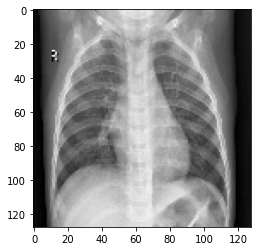

In [ ]:
a = random.randint(0, 467)

imagen_real = imagenes_sanas_enfermas_totales[a]
print("Esta es la imagen real que vamos a reproducir con los diferentes modelos y a intentar clasificar en base a dichas reconstrucciones")
print("Imagen ", a)
plt.imshow(imagen_real)


CELDA 59 - Presentación de imagen reconstruida con modelo de sanas

Esta imagen ha sido reconstruida con el modelo entrenado con imágenes sanas
Imagen  109
Con un error cuadrático medio de:  0.001763585403527286
Y una similitud estructural de:  0.8094637755993737


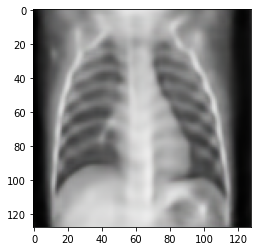

In [ ]:
predicion_modelo_sana = autoencoder_cargado_sanas.predict(imagenes_sanas_enfermas_totales)

pred_sana = predicion_modelo_sana[a]

mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
simil_sana = ssim(pred_sana, imagen_real, multichannel=True, data_range=predicion_modelo_sana[a].max() - predicion_modelo_sana[a].min())

print("Esta imagen ha sido reconstruida con el modelo entrenado con imágenes sanas")
print("Imagen ", a)
print("Con un error cuadrático medio de: ", mse_sana)
print("Y una similitud estructural de: ", simil_sana)
plt.imshow(pred_sana)




CELDA 60 - Presentación de imagen reconstruida con modelo de enfermas

In [ ]:
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(imagenes_sanas_enfermas_totales)

pred_enferma = predicion_modelo_enferma[a]

mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
simil_enferma = ssim(pred_enferma, imagen_real, multichannel=True, data_range=predicion_modelo_enferma[a].max() - predicion_modelo_enferma[a].min())

print("Esta imagen ha sido reconstruida con el modelo entrenado con imágenes enfermas")
print("Imagen ", a)
print("Con un error cuadrático medio de: ", mse_enferma)
print("Y una similitud estructural de: ", simil_enferma)
plt.imshow(pred_enferma)

IndexError: ignored

CELDA 61 - Clasificación de la imagen en base a los resultados anteriormente obtenidos

In [ ]:
a = str(a)
print("Similitud enferma: ", simil_enferma, "\nSimilitud sana: ", simil_sana, "\nMSE enferma: ", mse_enferma, "\nMSE sana: ", mse_sana )
if (simil_enferma > simil_sana and mse_enferma > mse_sana) : 
  print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como ENFERMA pero con un posible error")

if (simil_enferma > simil_sana and mse_sana > mse_enferma) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como ENFERMA")

if (simil_sana > simil_enferma and mse_enferma > mse_sana) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como SANA")

if (simil_sana > simil_enferma and mse_sana > mse_enferma) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como SANA pero con posible error")  

if (simil_sana == simil_enferma and mse_sana > mse_enferma) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, no podemos clasificar la imagen " + a + " con certeza")  


Similitud enferma:  0.8484594466409847 
Similitud sana:  0.8044126703157968 
MSE enferma:  0.021631634497139073 
MSE sana:  0.0016996182483338615
Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen 66 como ENFERMA pero con un posible error


CELDA 62 - Clasificador de imagen aleatoria como sana o enferma

In [ ]:
#num = 0
num = random.randint(0,467)

imagen_real = imagenes_sanas_enfermas_totales[num]

predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(imagenes_sanas_enfermas_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(imagenes_sanas_enfermas_totales)

pred_enferma = predicion_modelo_enferma[num]
pred_sana = predicion_modelo_sana[num]

mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
simil_enferma = ssim(pred_enferma, imagen_real, multichannel=True, data_range=predicion_modelo_enferma[num].max() - predicion_modelo_enferma[num].min())

mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
simil_sana = ssim(pred_sana, imagen_real, multichannel=True, data_range=predicion_modelo_sana[num].max() - predicion_modelo_sana[num].min())

a = str(num)
print("Similitud enferma: ", simil_enferma, "\nSimilitud sana: ", simil_sana, "\nMSE enferma: ", mse_enferma, "\nMSE sana: ", mse_sana )
if (simil_enferma > simil_sana and mse_enferma > mse_sana) : 
  print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como ENFERMA pero con un posible error")

if (simil_enferma > simil_sana and mse_sana > mse_enferma) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como ENFERMA")

if (simil_sana > simil_enferma and mse_enferma > mse_sana) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como SANA")

if (simil_sana > simil_enferma and mse_sana > mse_enferma) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen " + a + " como SANA pero con posible error")  

if (simil_sana == simil_enferma and mse_sana > mse_enferma) : 
    print("Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, no podemos clasificar la imagen " + a + " con certeza")  

Similitud enferma:  0.8484594466409847 
Similitud sana:  0.8044126703157968 
MSE enferma:  0.001230276382778969 
MSE sana:  0.0016996182483338615
Comparando los errores cuadráticos medios y similitud estructural de ambas reconstrucciones, podemos clasificar la imagen 66 como ENFERMA


# Pruebas sobre ambos modelos con imágenes previamente clasificadas


CELDA 63 - Prueba para observar si todas las imágenes enfermas de prueba son clasificadas correctamente como ENFERMAS por nuestro modelo

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_enfermas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_enfermas_images_totales)
leng = len(test_enfermas_images_totales)

for i in range(len(test_enfermas_images_totales)):

  imagen_real = test_enfermas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]

  pred_sana = predicion_modelo_sana[i]

  mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
  #simil_enferma = ssim(pred_enferma, imagen_real, multichannel=True, data_range=predicion_modelo_enferma[i].max() - predicion_modelo_enferma[i].min())

  mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
  #simil_sana = ssim(pred_sana, imagen_real, multichannel=True, data_range=predicion_modelo_sana[i].max() - predicion_modelo_sana[i].min())  
  if (mse_sana > mse_enferma ) :
    print(mse_sana)
    print(mse_enferma)
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
  else:
    sumatorio = sumatorio + 0
  
  
leng = len(test_enfermas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes ENFERMAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

0.0017684505858422041
0.0013627227953265436
//
0.0035040525329089623
0.002739288232562223
//
0.002059604475924048
0.0014287827723200523
//
0.0016943866570551232
0.0013217136724550103
//
0.002879730225741289
0.002266929989231651
//
0.0024880817958833337
0.0022146237614110737
//
0.0018117575583960332
0.001409125181907437
//
0.002702796097029383
0.002068015141643095
//
0.0013013061907614669
0.0009324875509124554
//
0.001352545158620091
0.0010519829956337006
//
0.0018034358970644507
0.0013508193975343972
//
0.002024752182620115
0.001599460166834553
//
0.0036648832093594693
0.0028616429278192613
//
0.0018380198806004456
0.0012132705063107785
//
0.0018890196019397077
0.0013475214040395993
//
0.001954282054242552
0.0015674236871177337
//
0.0016189650857947144
0.0013554757111409101
//
0.0014712261373187336
0.0010852290960821703
//
0.0016851532270714521
0.001384828806367259
//
0.0029702154108967095
0.0023102288514753994
//
0.001670692043169324
0.0011826860201355918
//
0.0034827980724845033
0.00

CELDA 64 - Prueba para observar si todas las imágenes sanas de prueba son clasificadas correctamente como SANAS por nuestro modelo

In [ ]:
sumatorio = 0

predicion_modelo_enferm = autoencoder_cargado_enfermas.predict(test_sanas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_sanas_images_totales)
leng = len(test_sanas_images_totales)

for i in range(len(test_sanas_images_totales)):
    
    imagen_real = test_sanas_images_totales[i]
    pred_enferma = predicion_modelo_enferm[i]
    pred_sana = predicion_modelo_sana[i]
    mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
    #simil_enferma = ssim(pred_enferma, imagen_real, multichannel=True, data_range=predicion_modelo_enferma[i].max() - predicion_modelo_enferma[i].min())
    mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
    
    #simil_sana = ssim(pred_sana, imagen_real, multichannel=True, data_range=predicion_modelo_sana[i].max() - predicion_modelo_sana[i].min())  
    if (mse_enferma > mse_sana ) :
      print(mse_sana)
      print(mse_enferma)
      print("//")
      sumatorio = sumatorio + 1
      #print("1")
    else:
      print(mse_sana)
      print(mse_enferma)
      print("//")
      sumatorio = sumatorio + 0
  
  
leng = len(test_sanas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes SANAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

0.0017156692720258309
0.0013768095467753432
//
0.002797582924503639
0.0022725310633171245
//
0.002367148880879253
0.0019583128245237364
//
0.002555814450789302
0.001809387790217957
//
0.0028778735650415842
0.002625534427121451
//
0.004183320060035246
0.003255325481158982
//
0.004438084565291051
0.003318164269097699
//
0.0029614702131600004
0.002578157581815194
//
0.0022856315916069255
0.0018205259712149773
//
0.003604514442277735
0.002577686729414196
//
0.0030515525606330147
0.002329343880609626
//
0.003482132568887297
0.002836820169029683
//
0.004741454329931844
0.0027234737134646365
//
0.0026273816990089773
0.002100757809880862
//
0.002249209763725741
0.0017340560850225039
//
0.003380384776763575
0.0026826700044451385
//
0.0025869200666604904
0.002109803300885979
//
0.003943261585299466
0.0033534182850957664
//
0.003265757435681896
0.002517519138845699
//
0.006485762335798984
0.0037396244710597355
//
0.0036092096630039607
0.0030581017463305166
//
0.0035174961619131814
0.0029049180213

# Pruebas Totales


Primero obtengo el MSE (media y mediana) del autoencoder SANO con las imágenes SANAS de entrenamiento

In [ ]:
predicted_sanas_entrenamiento = autoencoder_cargado_sanas.predict(train_sanas_images_total)
error_e = 0
acum = 0
errores = np.array([])
for i in range(len(predicted_sanas_entrenamiento)):
  imagen_a = train_sanas_images_total[i]
  imagen_b = predicted_sanas_entrenamiento[i]
  error = np.square(np.subtract(imagen_a, imagen_b)).mean()
  #print(error)
  errores = np.append(errores, error)
  error_e = error_e + error
  #print(error_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

mse_med_san_entr = error_e / acum
error_mediana_sanas = np.median(errores)
print(errores)
print(error_mediana_sanas)
print("El error cuadratico medio de la reconstrucción de todas las imágenes sanas de entrenamiento es --> ", error_e, " / ", acum, " = ", mse_med_san_entr)
print("La mediana de los errores cuadraticos medios de la reconstrucción de todas las imágenes sanas de entrenamiento es --> ", error_mediana_sanas)

[0.0038328  0.00482231 0.00283333 ... 0.00277445 0.00248952 0.00326135]
0.0032636138805684192
El error cuadratico medio de la reconstrucción de todas las imágenes sanas de entrenamiento es -->  4.575224359769504  /  1340  =  0.003414346537141421
La mediana de los errores cuadraticos medios de la reconstrucción de todas las imágenes sanas de entrenamiento es -->  0.0032636138805684192


Segundo obtenemos el MSE (media y mediana) del autoencoder ENNFERMO con las imágenes ENFERMAS de entrenamiento

In [ ]:
predicted_enfermas_entrenamiento = autoencoder_cargado_enfermas.predict(train_enfermas_images_total)
error_e = 0
acum = 0
errores = np.array([])
for i in range(len(predicted_enfermas_entrenamiento)):
  imagen_a = train_enfermas_images_total[i]
  imagen_b = predicted_enfermas_entrenamiento[i]
  error = np.square(np.subtract(imagen_a, imagen_b)).mean()
  #print(error)
  errores = np.append(errores, error)
  error_e = error_e + error
  #print(error_e)
  acum = acum + 1
  #print(acum)
  #print("\n")

mse_med_enf_entr = error_e / acum
error_mediana_enfermas = np.median(errores)
print(errores)
print(error_mediana_enfermas)
print("El error cuadratico medio de la reconstrucción de todas las imágenes enfermas de entrenamiento es --> ", error_e, " / ", acum, " = ", mse_med_enf_entr)
print("La mediana de los errores cuadraticos medios de la reconstrucción de todas las imágenes enfermas de entrenamiento es --> ", error_mediana_enfermas)

[0.00158151 0.00174291 0.00215338 ... 0.00191751 0.00170165 0.00075477]
0.0017424811496339764
El error cuadratico medio de la reconstrucción de todas las imágenes enfermas de entrenamiento es -->  2.5687600683008607  /  1360  =  0.0018887941678682799
La mediana de los errores cuadraticos medios de la reconstrucción de todas las imágenes enfermas de entrenamiento es -->  0.0017424811496339764


Probamos la clasificación de nuestro modelo ENFERMO sobre las imágenes de prueba ENFERMAS y utilizando la MEDIA

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_enfermas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_enfermas_images_totales)
leng = len(test_enfermas_images_totales)

for i in range(len(test_enfermas_images_totales)):

  imagen_real = test_enfermas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]
  pred_sana = predicion_modelo_sana[i]

  mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
  mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
  
  x = abs(mse_med_enf_entr - mse_enferma)
  y = abs(mse_med_san_entr - mse_sana)
  
  if (y > x) :
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_enfermas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes ENFERMAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

MSE_ENFERMA 0.0005260713725417363
MSE_SANA 0.001645895951299217
Enferma
//
MSE_ENFERMA 0.0008504940646939429
MSE_SANA 8.970599576754116e-05
Sana
//
MSE_ENFERMA 0.0004600113955482276
MSE_SANA 0.0013547420612173731
Enferma
//
MSE_ENFERMA 0.0005670804954132696
MSE_SANA 0.001719959880086298
Enferma
//
MSE_ENFERMA 0.0003781358213633711
MSE_SANA 0.0005346163114001322
Enferma
//
MSE_ENFERMA 0.0003258295935427938
MSE_SANA 0.0009262647412580875
Enferma
//
MSE_ENFERMA 0.00047966898596084285
MSE_SANA 0.001602588978745388
Enferma
//
MSE_ENFERMA 0.00017922097377481524
MSE_SANA 0.000711550440112038
Enferma
//
MSE_ENFERMA 0.0009563066169558245
MSE_SANA 0.0021130403463799543
Enferma
//
MSE_ENFERMA 0.0008368111722345793
MSE_SANA 0.00206180137852133
Enferma
//
MSE_ENFERMA 0.0005379747703338827
MSE_SANA 0.0016109106400769705
Enferma
//
MSE_ENFERMA 0.00028933400103372696
MSE_SANA 0.001389594354521306
Enferma
//
MSE_ENFERMA 0.0009728487599509814
MSE_SANA 0.00025053667221804814
Sana
//
MSE_ENFERMA 0.0006755

Probamos la clasificación de nuestro modelo SANO sobre las imágenes de prueba SANAS y utilizando la MEDIA

In [ ]:
sumatorio = 0

predicion_modelo_enferm = autoencoder_cargado_enfermas.predict(test_sanas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_sanas_images_totales)
leng = len(test_sanas_images_totales)

for i in range(len(test_sanas_images_totales)):
    
  imagen_real = test_sanas_images_totales[i]

  pred_enferma = predicion_modelo_enferm[i]
  pred_sana = predicion_modelo_sana[i]

  mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
  mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
    
  x = abs(mse_med_enf_entr - mse_enferma)
  y = abs(mse_med_san_entr - mse_sana)
  
  if (x > y) :
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_sanas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes SANAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

MSE_ENFERMA 0.0005119846210929367
MSE_SANA 0.0016986772651155903
Enferma
//
MSE_ENFERMA 0.0003837368954488446
MSE_SANA 0.0006167636126377823
Enferma
//
MSE_ENFERMA 6.951865665545654e-05
MSE_SANA 0.001047197656262168
Enferma
//
MSE_ENFERMA 7.940637765032287e-05
MSE_SANA 0.000858532086352119
Enferma
//
MSE_ENFERMA 0.0007367402592531713
MSE_SANA 0.0005364729720998369
Sana
//
MSE_ENFERMA 0.001366531313290702
MSE_SANA 0.0007689735228938246
Sana
//
MSE_ENFERMA 0.0014293701012294193
MSE_SANA 0.00102373802814963
Sana
//
MSE_ENFERMA 0.000689363413946914
MSE_SANA 0.00045287632398142074
Sana
//
MSE_ENFERMA 6.82681966533026e-05
MSE_SANA 0.0011287149455344956
Enferma
//
MSE_ENFERMA 0.0006888925615459163
MSE_SANA 0.00019016790513631376
Sana
//
MSE_ENFERMA 0.0004405497127413459
MSE_SANA 0.0003627939765084064
Sana
//
MSE_ENFERMA 0.000948026001161403
MSE_SANA 6.77860317458757e-05
Sana
//
MSE_ENFERMA 0.0008346795455963566
MSE_SANA 0.0013271077927904228
Enferma
//
MSE_ENFERMA 0.0002119636420125821
MSE_SA

Probamos la clasificación de nuestro modelo ENFERMO sobre las imágenes de prueba ENFERMAS y utilizando la MEDIANA

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_enfermas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_enfermas_images_totales)
leng = len(test_enfermas_images_totales)

for i in range(len(test_enfermas_images_totales)):

  imagen_real = test_enfermas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]
  pred_sana = predicion_modelo_sana[i]

  mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
  mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
  
  x = abs(error_mediana_enfermas - mse_enferma)
  y = abs(error_mediana_sanas - mse_sana)
  
  if (y > x) :
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_enfermas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes ENFERMAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

MSE_ENFERMA 0.0003797583543074328
MSE_SANA 0.001495163294726215
Enferma
//
MSE_ENFERMA 0.0009968070829282465
MSE_SANA 0.00024043865234054307
Sana
//
MSE_ENFERMA 0.0003136983773139241
MSE_SANA 0.0012040094046443712
Enferma
//
MSE_ENFERMA 0.0004207674771789661
MSE_SANA 0.001569227223513296
Enferma
//
MSE_ENFERMA 0.0005244488395976746
MSE_SANA 0.00038388365482713025
Sana
//
MSE_ENFERMA 0.00047214261177709735
MSE_SANA 0.0007755320846850856
Enferma
//
MSE_ENFERMA 0.00033335596772653933
MSE_SANA 0.001451856322172386
Enferma
//
MSE_ENFERMA 0.00032553399200911876
MSE_SANA 0.0005608177835390361
Enferma
//
MSE_ENFERMA 0.000809993598721521
MSE_SANA 0.0019623076898069524
Enferma
//
MSE_ENFERMA 0.0006904981540002757
MSE_SANA 0.0019110687219483283
Enferma
//
MSE_ENFERMA 0.0003916617520995792
MSE_SANA 0.0014601779835039686
Enferma
//
MSE_ENFERMA 0.00014302098279942344
MSE_SANA 0.0012388616979483041
Enferma
//
MSE_ENFERMA 0.001119161778185285
MSE_SANA 0.00040126932879105005
Sana
//
MSE_ENFERMA 0.00052

Probamos la clasificación de nuestro modelo SANO sobre las imágenes de prueba SANAS y utilizando la MEDIANA

In [ ]:
sumatorio = 0

predicion_modelo_enferm = autoencoder_cargado_enfermas.predict(test_sanas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_sanas_images_totales)
leng = len(test_sanas_images_totales)

for i in range(len(test_sanas_images_totales)):
    
  imagen_real = test_sanas_images_totales[i]

  pred_enferma = predicion_modelo_enferm[i]
  pred_sana = predicion_modelo_sana[i]

  mse_enferma = np.square(np.subtract(imagen_real, pred_enferma)).mean()
  mse_sana = np.square(np.subtract(imagen_real, pred_sana)).mean()
    
#  x = abs(mse_med_enf_entr - mse_enferma)
#  y = abs(mse_med_san_entr - mse_sana)

  x = abs(error_mediana_enfermas - mse_enferma)
  y = abs(error_mediana_sanas - mse_sana)
  
  if (x > y) :
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("MSE_ENFERMA", x)
    print("MSE_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_sanas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes SANAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

MSE_ENFERMA 0.00036567160285863316
MSE_SANA 0.0015479446085425884
Enferma
//
MSE_ENFERMA 0.0005300499136831481
MSE_SANA 0.0004660309560647804
Sana
//
MSE_ENFERMA 0.00021583167488976006
MSE_SANA 0.0008964649996891661
Enferma
//
MSE_ENFERMA 6.690664058398065e-05
MSE_SANA 0.0007077994297791171
Enferma
//
MSE_ENFERMA 0.0008830532774874748
MSE_SANA 0.000385740315526835
Sana
//
MSE_ENFERMA 0.0015128443315250055
MSE_SANA 0.0009197061794668266
Sana
//
MSE_ENFERMA 0.0015756831194637228
MSE_SANA 0.0011744706847226318
Sana
//
MSE_ENFERMA 0.0008356764321812175
MSE_SANA 0.00030214366740841884
Sana
//
MSE_ENFERMA 7.804482158100092e-05
MSE_SANA 0.0009779822889614937
Enferma
//
MSE_ENFERMA 0.0008352055797802198
MSE_SANA 0.00034090056170931566
Sana
//
MSE_ENFERMA 0.0005868627309756494
MSE_SANA 0.0002120613199354045
Sana
//
MSE_ENFERMA 0.0010943390193957066
MSE_SANA 0.0002185186883188776
Sana
//
MSE_ENFERMA 0.00098099256383066
MSE_SANA 0.0014778404493634247
Enferma
//
MSE_ENFERMA 0.00035827666024688563


AHORA PROBAMOS CON LA SIMILITUD

In [ ]:
predicted_sanas_entrenamiento = autoencoder_cargado_sanas.predict(train_sanas_images_total)
ssima_e = 0
acum = 0
similitudes = np.array([])
for i in range(len(predicted_sanas_entrenamiento)):
  imagen_a = train_sanas_images_total[i]
  imagen_b = predicted_sanas_entrenamiento[i]
  ssima = ssim(imagen_a, imagen_b, multichannel=True, data_range=predicted_sanas_entrenamiento[i].max() - predicted_sanas_entrenamiento[i].min())
  ssima_e = ssima_e + ssima
  similitudes = np.append(similitudes, ssima)
  acum = acum + 1
  
sim_med_san_ent = ssima_e / acum
similitudes_mediana_sanas = np.median(similitudes)
print(similitudes)
print(similitudes_mediana_sanas)
print("La similitud media de la reconstrucción de todas las imágenes sanas de entrenamiento es --> ", ssima_e, " / ", acum, " = ", sim_med_san_ent)
print("La similitud mediana de la reconstrucción de todas las imágenes sanas de entrenamiento es --> ", similitudes_mediana_sanas)

[0.65850869 0.63740579 0.66001657 ... 0.70093538 0.69833247 0.67118953]
0.6476773134778092
La similitud media de la reconstrucción de todas las imágenes sanas de entrenamiento es -->  863.9652466061531  /  1340  =  0.6447501840344426
La similitud mediana de la reconstrucción de todas las imágenes sanas de entrenamiento es -->  0.6476773134778092


In [ ]:
predicted_enfermas_entrenamiento = autoencoder_cargado_enfermas.predict(train_enfermas_images_total)
ssima_e = 0
acum = 0
similitudes = np.array([])
for i in range(len(predicted_enfermas_entrenamiento)):
  imagen_a = train_enfermas_images_total[i]
  imagen_b = predicted_enfermas_entrenamiento[i]
  ssima = ssim(imagen_a, imagen_b, multichannel=True, data_range=predicted_enfermas_entrenamiento[i].max() - predicted_enfermas_entrenamiento[i].min())
  ssima_e = ssima_e + ssima
  similitudes = np.append(similitudes, ssima)
  acum = acum + 1
  
sim_med_enf_ent = ssima_e / acum
similitudes_mediana_enfermas = np.median(similitudes)
print(similitudes)
print(similitudes_mediana_enfermas)
print("La similitud media de la reconstrucción de todas las imágenes enfermas de entrenamiento es --> ", ssima_e, " / ", acum, " = ", sim_med_enf_ent)
print("La similitud mediana de la reconstrucción de todas las imágenes enfermas de entrenamiento es --> ", similitudes_mediana_enfermas)

[0.76265827 0.75352878 0.78950576 ... 0.79091598 0.7698957  0.86109147]
0.7676728601904225
La similitud media de la reconstrucción de todas las imágenes enfermas de entrenamiento es -->  1037.179097720804  /  1360  =  0.7626316895005912
La similitud mediana de la reconstrucción de todas las imágenes enfermas de entrenamiento es -->  0.7676728601904225


Probamos la clasificación de nuestro modelo ENFERMO sobre las imágenes de prueba ENFERMAS y utilizando la MEDIA

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_enfermas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_enfermas_images_totales)
leng = len(test_enfermas_images_totales)

for i in range(len(test_enfermas_images_totales)):

  imagen_real = test_enfermas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]
  pred_sana = predicion_modelo_sana[i]

  ssima_enferma = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_enferma[i].max() - predicion_modelo_enferma[i].min())
  ssima_sana = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_sana[i].max() - predicion_modelo_sana[i].min())

  x = abs(sim_med_enf_ent - ssima_enferma)
  y = abs(sim_med_san_ent - ssima_sana)
  
  if (y > x) :
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_enfermas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes ENFERMAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

SIMILITUD_ENFERMA 0.061054161925351624
SIMILITUD_SANA 0.1779219969382424
Enferma
//
SIMILITUD_ENFERMA 0.032003617305087384
SIMILITUD_SANA 0.1505393325712333
Enferma
//
SIMILITUD_ENFERMA 0.05311520923304369
SIMILITUD_SANA 0.1680347792901018
Enferma
//
SIMILITUD_ENFERMA 0.06775295440248286
SIMILITUD_SANA 0.17784354430254679
Enferma
//
SIMILITUD_ENFERMA 0.006014101687888296
SIMILITUD_SANA 0.1176192649925707
Enferma
//
SIMILITUD_ENFERMA 0.02960178438929706
SIMILITUD_SANA 0.1450930320753956
Enferma
//
SIMILITUD_ENFERMA 0.023169265473879763
SIMILITUD_SANA 0.13524137776985778
Enferma
//
SIMILITUD_ENFERMA 0.029012130183787677
SIMILITUD_SANA 0.08442517024844487
Enferma
//
SIMILITUD_ENFERMA 0.055749612179311514
SIMILITUD_SANA 0.1760141076221048
Enferma
//
SIMILITUD_ENFERMA 0.07829736425155143
SIMILITUD_SANA 0.1940384471967871
Enferma
//
SIMILITUD_ENFERMA 0.021411072930337727
SIMILITUD_SANA 0.10744194777559535
Enferma
//
SIMILITUD_ENFERMA 0.054071496389288654
SIMILITUD_SANA 0.16300895398994864
En

Probamos la clasificación de nuestro modelo SANO sobre las imágenes de prueba SANAS y utilizando la MEDIA

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_sanas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_sanas_images_totales)
leng = len(test_sanas_images_totales)

for i in range(len(test_sanas_images_totales)):

  imagen_real = test_sanas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]
  pred_sana = predicion_modelo_sana[i]

  ssima_enferma = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_enferma[i].max() - predicion_modelo_enferma[i].min())
  ssima_sana = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_sana[i].max() - predicion_modelo_sana[i].min())

  x = abs(sim_med_enf_ent - ssima_enferma)
  y = abs(sim_med_san_ent - ssima_sana)
  
  if (x > y) :
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_sanas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes SANAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

SIMILITUD_ENFERMA 0.031370246071243835
SIMILITUD_SANA 0.08287179567172576
Enferma
//
SIMILITUD_ENFERMA 0.0011365288183271538
SIMILITUD_SANA 0.11673417077870363
Enferma
//
SIMILITUD_ENFERMA 0.021908110721844398
SIMILITUD_SANA 0.09474300374499722
Enferma
//
SIMILITUD_ENFERMA 0.029250955117202437
SIMILITUD_SANA 0.09178033773611816
Enferma
//
SIMILITUD_ENFERMA 0.027411795497967795
SIMILITUD_SANA 0.0890159159433952
Enferma
//
SIMILITUD_ENFERMA 0.06148527528021275
SIMILITUD_SANA 0.057853001010856
Sana
//
SIMILITUD_ENFERMA 0.030282243055830382
SIMILITUD_SANA 0.08222899566294739
Enferma
//
SIMILITUD_ENFERMA 0.07127354100973093
SIMILITUD_SANA 0.04666204497471682
Sana
//
SIMILITUD_ENFERMA 0.059377184989178655
SIMILITUD_SANA 0.0343156049587936
Sana
//
SIMILITUD_ENFERMA 0.03597271414970793
SIMILITUD_SANA 0.06440975143303751
Enferma
//
SIMILITUD_ENFERMA 0.01789467788677257
SIMILITUD_SANA 0.09618430422317337
Enferma
//
SIMILITUD_ENFERMA 0.02568195105913118
SIMILITUD_SANA 0.09047108765493383
Enferma


Probamos la clasificación de nuestro modelo ENFERMO sobre las imágenes de prueba ENFERMAS y utilizando la MEDIANA

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_enfermas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_enfermas_images_totales)
leng = len(test_enfermas_images_totales)

for i in range(len(test_enfermas_images_totales)):

  imagen_real = test_enfermas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]
  pred_sana = predicion_modelo_sana[i]

  ssima_enferma = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_enferma[i].max() - predicion_modelo_enferma[i].min())
  ssima_sana = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_sana[i].max() - predicion_modelo_sana[i].min())

  x = abs(similitudes_mediana_enfermas - ssima_enferma)
  y = abs(similitudes_mediana_sanas - ssima_sana)
  
  if (y > x) :
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_enfermas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes ENFERMAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

SIMILITUD_ENFERMA 0.05601299123552039
SIMILITUD_SANA 0.1749948674948758
Enferma
//
SIMILITUD_ENFERMA 0.026962446615256153
SIMILITUD_SANA 0.14761220312786671
Enferma
//
SIMILITUD_ENFERMA 0.04807403854321246
SIMILITUD_SANA 0.1651076498467352
Enferma
//
SIMILITUD_ENFERMA 0.06271178371265163
SIMILITUD_SANA 0.1749164148591802
Enferma
//
SIMILITUD_ENFERMA 0.011055272377719527
SIMILITUD_SANA 0.1146921355492041
Enferma
//
SIMILITUD_ENFERMA 0.024560613699465828
SIMILITUD_SANA 0.142165902632029
Enferma
//
SIMILITUD_ENFERMA 0.018128094784048532
SIMILITUD_SANA 0.1323142483264912
Enferma
//
SIMILITUD_ENFERMA 0.03405330087361891
SIMILITUD_SANA 0.08149804080507828
Enferma
//
SIMILITUD_ENFERMA 0.05070844148948028
SIMILITUD_SANA 0.1730869781787382
Enferma
//
SIMILITUD_ENFERMA 0.0732561935617202
SIMILITUD_SANA 0.1911113177534205
Enferma
//
SIMILITUD_ENFERMA 0.016369902240506495
SIMILITUD_SANA 0.10451481833222875
Enferma
//
SIMILITUD_ENFERMA 0.04903032569945742
SIMILITUD_SANA 0.16008182454658204
Enferma


Probamos la clasificación de nuestro modelo SANO sobre las imágenes de prueba SANAS y utilizando la MEDIANA

In [ ]:
sumatorio = 0
predicion_modelo_enferma = autoencoder_cargado_enfermas.predict(test_sanas_images_totales)
predicion_modelo_sana = autoencoder_cargado_sanas.predict(test_sanas_images_totales)
leng = len(test_sanas_images_totales)

for i in range(len(test_sanas_images_totales)):

  imagen_real = test_sanas_images_totales[i]

  pred_enferma = predicion_modelo_enferma[i]
  pred_sana = predicion_modelo_sana[i]

  ssima_enferma = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_enferma[i].max() - predicion_modelo_enferma[i].min())
  ssima_sana = ssim(imagen_real, pred_enferma, multichannel=True, data_range=predicion_modelo_sana[i].max() - predicion_modelo_sana[i].min())

  x = abs(similitudes_mediana_enfermas - ssima_enferma)
  y = abs(similitudes_mediana_sanas - ssima_sana)
  
  if (x > y) :
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Sana")
    print("//")
    sumatorio = sumatorio + 1
    #print("1")
    
  else:
    print("SIMILITUD_ENFERMA", x)
    print("SIMILITUD_SANA", y)
    print("Enferma")
    print("//")
    sumatorio = sumatorio + 0
  
  
leng = len(test_sanas_images_totales)
result = sumatorio / leng
result = result * 100
print("De un total de ", leng, " imágenes SANAS, nuestro modelo ha acertado ", sumatorio, "/",leng, "es decir, un ", result, "% de acierto")

SIMILITUD_ENFERMA 0.036411416761075066
SIMILITUD_SANA 0.07994466622835916
Enferma
//
SIMILITUD_ENFERMA 0.0039046418715040776
SIMILITUD_SANA 0.11380704133533703
Enferma
//
SIMILITUD_ENFERMA 0.02694928141167563
SIMILITUD_SANA 0.09181587430163063
Enferma
//
SIMILITUD_ENFERMA 0.03429212580703367
SIMILITUD_SANA 0.08885320829275156
Enferma
//
SIMILITUD_ENFERMA 0.032452966187799026
SIMILITUD_SANA 0.0860887865000286
Enferma
//
SIMILITUD_ENFERMA 0.06652644597004398
SIMILITUD_SANA 0.054925871567489404
Sana
//
SIMILITUD_ENFERMA 0.035323413745661614
SIMILITUD_SANA 0.0793018662195808
Enferma
//
SIMILITUD_ENFERMA 0.07631471169956217
SIMILITUD_SANA 0.04373491553135023
Sana
//
SIMILITUD_ENFERMA 0.06441835567900989
SIMILITUD_SANA 0.031388475515427006
Sana
//
SIMILITUD_ENFERMA 0.04101388483953916
SIMILITUD_SANA 0.061482621989670916
Enferma
//
SIMILITUD_ENFERMA 0.0229358485766038
SIMILITUD_SANA 0.09325717477980677
Enferma
//
SIMILITUD_ENFERMA 0.030723121748962412
SIMILITUD_SANA 0.08754395821156724
Enferm

# ** Carga del modelo separado NO 

In [ ]:
num_modelo_a_cargar = 1
num_modelo_a_cargar = str(num_modelo_a_cargar)
path_modelo_a_cargar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Modelo_Autoencoder_"+num_modelo_a_cargar+".json"
path_peso_a_cargar = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Modelo_Autoencoder_"+num_modelo_a_cargar+".h5"
path_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Modelo_Encoder_"+num_modelo_a_cargar+".json"
peso_encoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Modelo_Encoder_"+num_modelo_a_cargar+".h5"
path_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Modelo_Decoder_"+num_modelo_a_cargar+".json"
peso_decoder = "/content/drive/My Drive/Colab Notebooks/TFG/Modelos/Modelo_Decoder_"+num_modelo_a_cargar+".h5"

# carga el json y crea el modelo
json_file = open(path_encoder, 'r')
loaded_model_json = json_file.read()

json_file_a = open(path_decoder, 'r')
loaded_model_json_a = json_file_a.read()

json_file_b = open(path_modelo_a_cargar, 'r')
loaded_model_json_b = json_file_b.read()

json_file.close()
json_file_a.close()
json_file_b.close()

encoder = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
encoder.load_weights(peso_encoder)
print("Modelo Encoder cargado desde el PC")
encoder.summary()

decoder = model_from_json(loaded_model_json_a)
# se cargan los pesos (weights) en el nuevo modelo
decoder.load_weights(peso_decoder)
print("Modelo Decoder cargado desde el PC")
decoder.summary()

autoencoder = model_from_json(loaded_model_json_b)
# se cargan los pesos (weights) en el nuevo modelo
autoencoder.load_weights(path_peso_a_cargar)
print("Modelo Autoencoder cargado desde el PC")
autoencoder.summary()

# Segunda parte que aquí no se utiliza

In [ ]:
#ENCODER + FLATTEN()

enc_flat_input = Input(shape=(128,128,3))

encoder_out = encoder(enc_flat_input)
flatten_out = Flatten()(encoder_out)

encoder_flatten = Model(enc_flat_input, flatten_out, name="Encoder_Flatten_model")
encoder_flatten.compile(optimizer='adamax', loss='mse', metrics=['acc'])
encoder_flatten.summary()


Model: "Encoder_Flatten_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
encoder_model (Functional)   (None, 16, 16, 8)         249208    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
Total params: 249,208
Trainable params: 249,208
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predicted_features = encoder_flatten.predict(train_images_total)

print("Número de imágenes en el vector -> ", len(predicted_features))
print("Número de caractersiticas por imagen -> ", len(predicted_features[0]))


In [ ]:
X = predicted_features
print(X.shape)

y = train_images_labels_total

print(y.shape)


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(500,), max_iter=300, activation ='relu', solver='adam', random_state=1, verbose=True, tol=0.00001, early_stopping=True, n_iter_no_change=20)
print("Clasificador MULTI-LAYER PERCEPTRON")

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=300)
print("Clasificador DECISSION TREE")

In [ ]:
clf = svm.SVC(C=5.0, decision_function_shape='ovo', kernel='rbf', max_iter=50000, tol=0.0001)
print("Clasificador SUPPORT VECTOR MACHINE")

In [ ]:
clf = LogisticRegression(C=10.0, max_iter=5000, multi_class='auto')
print("Clasificador LOGISTIC REGRESSION")

In [ ]:
clf = GaussianNB(var_smoothing=1e-10)
print("Clasificador NAIVE BAYES")

In [ ]:
print(clf)
clf.fit(X, y)
print("Clasificador entrenado \n")

In [ ]:
etiquetas_1 = np.load("/content/drive/My Drive/Colab Notebooks/TFG/test_image_label_file_0.npy")
etiquetas_2 = np.load("/content/drive/My Drive/Colab Notebooks/TFG/test_image_label_file_1.npy")
etiquetas_1 = np.array(etiquetas_1)
etiquetas_2 = np.array(etiquetas_2)
etiquetas = np.concatenate((etiquetas_1,etiquetas_2))
etiquetas = np.array(etiquetas)

print(clf)

imagen_cod_1 = encoder_flatten.predict(images_1)
result_1 = clf.predict(imagen_cod_1)
imagen_cod_1 = np.array(imagen_cod_1)

imagen_cod_2 = encoder_flatten.predict(images_2)
imagen_cod_2 = np.array(imagen_cod_2)
result_2 = clf.predict(imagen_cod_2)

result = np.concatenate((result_1, result_2))

#print(len(etiquetas_1))
#print("Etiquetas primer archivo \n", etiquetas_1)

#print(len(result_1))
#print("Etiquetas estimadas como resultado \n", result_1)

#print(len(etiquetas_2))
#print("Etiquetas segundo archivo \n", etiquetas_2)

#print(len(result_2))
#print("Etiquetas estimadas como resultado \n", result_2)

print(len(etiquetas))
print(len(result))

print("\n Etiquetas estimadas como resultado \n", result)
print("\n Etiquetas reales \n", etiquetas)

In [ ]:
print(clf)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(etiquetas_1, result_1)
print('\n \nAccuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(etiquetas_1, result_1, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(etiquetas_1, result_1,pos_label="1")
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(etiquetas_1, result_1,pos_label="1")
print('F1 score: %f' % f1)
# zero one loss
zerone = zero_one_loss(etiquetas_1, result_1, normalize='False')
print('Missclassifications: %f' % zerone)
#confussion matrix 
con_matrix = confusion_matrix(etiquetas_1, result_1)

print("Confusion matrix: \n",con_matrix)

GUARDA CLASIFICADOR

In [ ]:
tipo_class = "LOGREG"
num_class = "4"

with open('/content/drive/My Drive/Colab Notebooks/TFG/Clasificadores/'+tipo_class+'_'+num_class+'.pkl', 'wb') as fid:
    pickle.dump(clf, fid)
    print(clf)
    print("\nClasificador "+tipo_class+"_"+num_class+" se ha guardado correctamente")

CARGA CLASIFICADOR

In [ ]:
tipo_class = "MULTI"
num_class = "5"
with open('/content/drive/My Drive/Colab Notebooks/TFG/Clasificadores/'+tipo_class+'_'+num_class+'.pkl', 'rb') as fid:
    clf = pickle.load(fid)
    print(clf)
    print("\n Clasificador "+tipo_class+"_"+num_class+" se ha cargado correctamente")
